### 一、matplotlib 绘图库
######  （一）plt 直接绘图（二）fig和axes复杂绘图

（一）plt 直接绘图

In [ ]:
# 优点：Matplotlib 会自动管理 Figure 和 Axes，减少了代码量，适用于快速绘图和简单的任务。
# 缺点：灵活性较低，对图形的控制有限，尤其是在需要多个子图或复杂布局时。
# 以下为示例使用

import matplotlib.pyplot as plt

# 创建简单的线图
plt.plot([1, 2, 3], [1, 4, 9])
plt.title('直接调用 title 方法') # 本处未做任何字体配置 下文可见不正常展示 字体配置相关见下文
plt.xlabel('X轴')
plt.ylabel('Y轴')
plt.show()


（二）fig和axes复杂绘图 第一部分 关于fig
1. 简单示例代码  
2. 展示详解 plt.figure()  
3. 详解 <class 'matplotlib.figure.Figure'>的属性和方法 
4. 补充自定义matplotlib.figure.Figure图形类

In [ ]:
#### 1. 简单示例代码

# 优点：自建 Figure 和 Axes 对象，可以更精确地控制图形的布局和各个 Axes 的位置，特别是需要多个子图或特定布局时
# 缺点：代码较复杂，相对而言，需要更多的代码来创建和管理 Figure 和 Axes。
# 补充说明：但是还有更为底层的创建方式 figure.Figure 代表一个图形对象。它提供了更细粒度的控制和功能，适合需要自定义和扩展图形行为的情况。
# 以下为示例使用
import matplotlib.pyplot as plt

# 创建一个 Figure 对象
fig = plt.figure()

# 添加一个 Axes 对象
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])  # [left, bottom, width, height]

# 在 Axes 上绘制
ax.plot([1, 2, 3], [1, 4, 9])
ax.set_title('使用 Figure 和 Axes 对象')
ax.set_xlabel('X轴')
ax.set_ylabel('Y轴')

plt.show()

In [ ]:
#### 2.展示详解 plt.figure()

# 输入参数
# num        int 或 str 或 None  图形的编号或名称。如果指定的编号已经存在，Matplotlib 将返回该图形。如果为 None，则创建一个新的图形。
# figsize    tuple               图形的宽度和高度，以英寸为单位。格式为 (width, height)。
# dpi        int                 图形的分辨率（每英寸点数），用于控制图形的清晰度。较高的 dpi 值会导致更清晰的图像。
# facecolor    color              图形的背景颜色
# edgecolor    color              图形边框的颜色
# frameon      bool               是否显示图形边框。默认为 True，如果设置为 False，则不显示边框。
# FigureClass  type              用于创建图形的类，默认为 matplotlib.figure.Figure。可以自定义图形类。
# clear        bool             如果设置为 True，并且图形已经存在，则清除当前图形的内容。默认为 False。
# **kwargs     其他关键字参数，可以传递给图形的内部类（如 Figure）。允许用户设置更多的图形属性。

# 输出 <class 'matplotlib.figure.Figure'> 模块自定义的 Figure 对象 
import matplotlib.pyplot as plt
fig = plt.figure(num = 1,figsize = (10,5),dpi = 100,facecolor = 'lightgray',edgecolor = 'black',frameon =True)

# 为了展示出图片加个子图 下面能看到浅灰色的边，黑色的框源于这个fig
fig.add_axes([0.1, 0.1, 0.8, 0.8]) 

In [ ]:
#### 3. 详解 <class 'matplotlib.figure.Figure'>的属性和方法 
print(f'上文中生成的prop对象的 类型名称为：{type(fig)}')
print('其常见的方法为：获取生成此对象提供的参数')

# 前面为访问 后面#的代表如果需要重设怎么写 但是一般自己生成图 直接改生成参数就行
print(f'本图形对象的大小       :{fig.get_size_inches()}         ')  # fig.set_size_inches(new_width, new_height)
print(f'本图形对象的dpi        :{fig.dpi}                       ')  # fig.set_dpi(new_dpi)
print(f'本图形对象的背景色     :{fig.get_facecolor()}           ')  # fig.set_facecolor(new_color)
print(f'本图形对象的边框色     :{fig.get_edgecolor()}           ')  # fig.set_edgecolor(new_color)
print(f'本图形对象的边框是否开启   :{fig.frameon}               ')  # fig.frameon = False  # 或 True
print(f'本图形对象的坐标轴列表     :{fig.get_axes()}            ')  # 不建议修改 也修改不了
print(f'本图形对象是否控制子图适应 :{fig.get_tight_layout()}    ')  # fig.set_tight_layout(True)  # 或 False
print(f'访问本图形处理绘图事件和渲染的对象 :{fig.canvas}        ')  # 不能修改 但是可以再次调用渲染  canvas.draw()  # 重新绘制图形

# fig进一步绘图的方法 到第二部分去看具体
# add_subplot()   添加一个子图到当前图形中，并返回一个 Axes 对象
# add_axes()      在指定位置添加自定义大小的坐标轴，并返回 Axes 对象
# clear()         清除当前图形的所有内容，包括子图和标签。
# savefig()       将图形保存为文件，支持多种格式（如 PNG、PDF、SVG 等）


In [ ]:
#### 4.补充自定义matplotlib.figure.Figure图形类 

import matplotlib.pyplot as plt
from matplotlib.figure import Figure

# 自定义图形类，继承自 matplotlib.figure.Figure
class MyCustomFigure(Figure):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        # 添加自定义属性
        self.custom_property = "This is a custom figure!"

    def custom_method(self):
        print(self.custom_property)

# 使用自定义图形类创建图形
fig = plt.figure(FigureClass=MyCustomFigure, figsize=(8, 6))

# 添加一个子图
ax = fig.add_subplot(111)
ax.plot([1, 2, 3], [1, 4, 9])

# 调用自定义方法
fig.custom_method()


（二）fig和axes复杂绘图 第二部分 关于axes
1. 展示详解 fig.add_subplot()  
2. 展示详解 fig.add_axes() 
3. 详解 <class 'matplotlib.axes._axes.Axes'> 的属性和方法 此部分移步到 【绘图结构】部分查询

In [ ]:
# 此部分无需观看 下文字体部分会解释 这里代码的作用为修正中文不正确展示的问题
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
font_path = r'C:\\Users\\yaoyan\\AppData\\Local\\Microsoft\\Windows\\Fonts\\字魂45号-冰宇雅宋.ttf'
prop = fm.FontProperties(fname = font_path,weight = 'bold')
plt.rcParams['font.sans-serif'] = prop.get_name()

#### 1. 展示详解 fig.add_subplot()
# add_subplot() 会根据您指定的行数和列数自动布局子图，确保它们在图形中适当地排列。

# 还是先创建一个图形fig
fig =  plt.figure(num = 1,figsize = (15,5),dpi = 100,facecolor = 'lightgray',edgecolor = 'black',frameon =True)

# 输入参数 nrows, ncols, index
# nrows  int  子图的行数   
# ncols  int  子图的列数
# index  int  子图的位置 

# 输出 <class 'matplotlib.axes._axes.Axes'>模块自定义的 Figure 对象 
ax1 = fig.add_subplot(1, 2, 1)  # 1x2 1行2个 网格中的第一个子图
print(type(ax1))
ax2 = fig.add_subplot(1, 2, 2)  # 1x2 1行2个 网格中的第二个子图


#### 3. 详解 <class 'matplotlib.axes._axes.Axes'> 的属性和方法
# axes的主要方法都是和 绘图结构相关的 关于绘图结构可以看下面三 
# 在第一个子图上绘图
ax1.plot([1, 2, 3], [4, 5, 6], color='red', label='结算收入（税前）')
ax1.set_title('子图 1')  # 设置标题
ax1.set_xlabel('X 轴')    # 设置 X 轴标签
ax1.set_ylabel('Y 轴')    # 设置 Y 轴标签
ax1.legend()               # 显示图例

# 在第二个子图上绘图（示例）
ax2.plot([1, 2, 3], [6, 5, 4], color='blue', label='其他收入')
ax2.set_title('子图 2')  # 设置标题
ax2.set_xlabel('X 轴')    # 设置 X 轴标签
ax2.set_ylabel('Y 轴')    # 设置 Y 轴标签
ax2.legend()               # 显示图例

# 显示图形
# plt.tight_layout()  # 自动调整子图参数
plt.show()

In [ ]:
# 此部分无需观看 下文字体部分会解释 这里代码的作用为修正中文不正确展示的问题
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
font_path = r'C:\\Users\\yaoyan\\AppData\\Local\\Microsoft\\Windows\\Fonts\\字魂45号-冰宇雅宋.ttf'
prop = fm.FontProperties(fname = font_path,weight = 'bold')
plt.rcParams['font.sans-serif'] = prop.get_name()

#### 2. 展示详解 fig.add_axes()
# add_axes() 允许用户在图形的任何位置添加坐标轴，适合需要精确控制坐标轴位置时使用。

# 还是先创建一个图形fig
fig =  plt.figure(num = 1,figsize = (15,5),dpi = 100,facecolor = 'lightgray',edgecolor = 'black',frameon =True)

# 输入参数 nrows, ncols, index
# left    float  坐标轴左边缘相对于图形（Figure）左边缘的距离。取值范围是 0 到 1，0 表示在左边缘，1 表示在右边缘。   
# bottom  float  坐标轴下边缘相对于图形（Figure）下边缘的距离。取值范围是 0 到 1，0 表示在下边缘，1 表示在上边缘
# width   float  坐标轴的宽度，相对于图形宽度的比例。取值范围是 0 到 1，0 表示没有宽度，1 表示与图形的宽度相同。 
# height  float  坐标轴的高度，相对于图形高度的比例。取值范围是 0 到 1，0 表示没有高度，1 表示与图形的高度相同。 

# 输出 <class 'matplotlib.axes._axes.Axes'> 模块自定义的 Figure 对象 
# 尝试不同的参数 感觉坐标轴在fig中的位移 
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])  # 大部分区域
print(type(ax1))
# ax1 = fig.add_axes([0.5, 0.5, 0.5, 0.5])  # 中间部分
ax1 = fig.add_axes([0.0, 0.0, 1.0, 1.0])  # 整个区域
ax1 = fig.add_axes([0.1, 0.1, 0.6, 0.6])  # 中间偏上的区域

####  3. 详解 <class 'matplotlib.axes._axes.Axes'> 的属性和方法
# axes的主要方法都是和 绘图结构相关的 关于绘图结构可以看下面三 
# 在第一个子图上绘图
ax1.plot([1, 2, 3], [4, 5, 6], color='red', label='结算收入（税前）')
ax1.set_title('子图 1')  # 设置标题
ax1.set_xlabel('X 轴')    # 设置 X 轴标签
ax1.set_ylabel('Y 轴')    # 设置 Y 轴标签
ax1.legend()               # 显示图例

# 显示图形
# plt.tight_layout()  # 自动调整子图参数
plt.show()
fig.savefig(r"C:\Users\yaoyan\Downloads\测试结构图表.png", dpi=300, bbox_inches='tight')

（二）fig和axes复杂绘图 第三部分 关于subplot

In [ ]:
# 自适应管理图像和小分区画布 简易写法
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
print(type(fig))
print(type(ax))

# # 另外无论是否简易写法 他都可以完成和df的plt的自定义
# import pandas as pd
# data = {
#     'A': [10, 20, 30, 40],
#     'B': [15, 25, 35, 45],
#     'C': ['black','white','black','white']
# }
# df = pd.DataFrame(data)

# df['A'].plot.bar()
# df.groupby('C').agg(A列求和 = ('A','sum')).plot.barh(stacked = True)

### 二、matplotlib font_manager
###### （一）查找所有字体 （二）加载字体  （三）FontProperties常见属性和方法（四）设置字体

（一）查找所有字体 

In [ ]:
# 导入库命名为fm
from matplotlib import font_manager as fm

# fm.findSystemFonts 模块方法 无需给出参数 输出计算机上所有安装的字体路径 的<class 'list'>
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list

（二）加载字体 创建一个具有字体属性的FontProperties 对象

In [ ]:
from matplotlib import font_manager as fm
# fm.FontProperties() 字体的属性

# 输入参数
# family   str 或 list  字体的家族（如 'serif', 'sans-serif', 'monospace'）。可以指定单个字体系列或多个字体系列的列表。
# style    str          字体样式，如 'normal', 'italic', 'oblique'。用于设置文本的样式。
# weight   str 或 int   字体的粗细，如 'normal', 'bold', 'heavy'，或使用 100 到 900 的数值表示。
# size     float 或 str 字体大小，可以是浮点数（如 12.0）或字符串（如 'large', 'small'）
# stretch  str 或 int   字体的拉伸程度，如 'normal', 'condensed', 'expanded'，或使用数值表示。
# variant  str          字体的变体，通常用于设置小型大写字母（如 'small-caps'）
# fname    str          字体文件的路径，通常是 .ttf 或 .otf 文件。通过这个参数可以加载自定义字体。

# 输出 <class 'matplotlib.font_manager.FontProperties'> 模块自定义的 FontProperties 对象
font_path = r'C:\\Users\\yaoyan\\AppData\\Local\\Microsoft\\Windows\\Fonts\\字魂64号-萌趣软糖体.ttf'
prop = fm.FontProperties(fname=font_path, style='italic', weight='bold',size=20, stretch= 'extra-condensed',variant= 'small-caps')



（三）FontProperties常见属性和方法

In [ ]:
print(f'上文中生成的prop对象的 类型名称为：{type(prop)}')
print('其常见的方法为：获取生成此对象提供的参数')

print(f'本对象的字体样式style   :{prop.get_style()}    ')
print(f'本对象的字体粗细weight  :{prop.get_weight()}   ')
print(f'本对象的字体大小size    :{prop.get_size()}     ')
print(f'本对象的字体拉伸stretch :{prop.get_stretch()}  ')
print(f'本对象的字体变体variant :{prop.get_variant()}  ')
print(f'本对象的字体地址fname   :{prop.get_file()}     ')
print(f'本对象的字体名字name    :{prop.get_name()}     一般用于rcParams中全局调整字体时提供的参数值')

# 避免深浅拷贝问题 .copy方法
print(f'prop的内存地址为：{id(prop)}')
prop1 = prop.copy()
print(f'prop1的内存地址为：{id(prop1)}')

（四）设置字体

In [ ]:
# 负责绘画的plt 对于图标的每个可视化部分都有个方法 ，比如图标的标题叫title 下面以他举例
# 绘画title时候 可供提交值的参数 会有fontproperties 输入加载字体 准备的 FontProperties 对象 即可应用上字体
# 默认的字体无法正常展示中文 所以基本必须自己指定
import matplotlib.pyplot as plt
plt.title('标题', fontproperties=prop)
plt.show()

### 三、matplotlib 可视化结构剖析
（一）绘图结构剖析 （二）axes的属性和方法详解

（一）绘图结构剖析

In [ ]:
from IPython.display import Image, display
image_path = r"D:\1-script\3-PYTHON\image存储jupyter在用的图片存放于此\绘图结构剖析图.jpg"
display(Image(filename = image_path,width=500, height=500))

# 调用代码看到图
# 分为  
'''
title  图表标题
grids  网格线
xlabel x轴标签
ylabel y轴标签
xticks x轴刻度
yticks y轴刻度
legend 图例
markers 标记
plot    数据构成的各类图 示例为line plot折线图 其他主要的还有条形图 bar chart 箱型图 box plot 散点图 scatter plot 直方图 histogram
'''

 （二）axes的属性和方法详解
1. 画图方法

In [ ]:
# 1. 画图方法
#### ax1.plot()       绘制线图
# 输入参数 前三个参数请用位置参数传递 
# x          array-like       X 轴数据的坐标值  默认第一个参数 
# y          array-like       Y 轴数据的坐标值  默认第二个参数
# fmt        str              格式字符串，默认第三个 参数 用于指定线的样式、标记和颜色。'-'：实线   '--'：虚线   ':'：点线   '.'：点    'ro'：红色圆点
# label      str              曲线的标签，用于图例（legend）会直接改掉y轴的刻度 别用 所以后面的参数都不能位置调用了
# color      str 或 tuple     指定线条的颜色。可以使用颜色名称、十六进制字符串、RGB 或 RGBA 元组。
# linestyle  str              指定线条的样式。'-'：实线   '--'：虚线     ':'：点线    'None' 或 ''：无线条
# linewidth  float            指定线条的宽度。
# markersize float            指定标记的大小。
# marker     str              指定数据点的标记类型。'o'：圆    's'：方     '^'：三角形      '*'：星形
# alpha      float            指定线条的透明度，范围从 0（完全透明）到 1（完全不透明）
# zorder     float            指定图形的绘制顺序，数值越大，绘制越靠上，适用于重叠图形

# 输出  Line2D 类 的 列表list 可用于调整线条属性 获取构成线条的数据


#### ax1.scatter()    绘制散点图
# 输入参数 
# x          array-like            X 轴数据的坐标值。每个值对应一个散点的水平位置  默认第一个参数 
# y          array-like            Y 轴数据的坐标值。每个值对应一个散点的垂直位置  默认第二个参数
# s          array-like 或 scalar  决定散点大小 可以输入数组每个大小都不同， 或者给一个固定值          
# c          array-like 或 scalar  决定散点颜色  散点的颜色。可以是单一颜色、颜色名称、十六进制字符串、RGB 或 RGBA 元组，也可以是一个数组（根据数据值为每个散点指定不同的颜色）    
# alpha      float                 散点的透明度，范围从 0（完全透明）到 1（完全不透明）
# marker     str                   散点的标记样式，'o'：圆    's'：方     '^'：三角形      '*'：星形
# cmap       Colormap              如果 c 参数是数组，cmap 参数用于指定颜色映射（colormap）。
# edgecolor  str 或 array-like     散点边缘的颜色。可以指定为单一颜色或数组（每个散点不同的边缘颜色）
# linewidth  float 或 array-like   散点边缘的宽度
# zorder     float                 指定图形的绘制顺序，数值越大，绘制越靠上，适用于重叠图形

# 关于 cmap参数的特别信息 cmap = 'viridis' 下面都为可替换的值 最推荐viridis 也是默认值
# viridis 的特点 
# 色盲友好: viridis 颜色映射在色盲用户中表现良好，确保信息的可读性。
# 渐变色: 颜色从深紫色（低值）渐变到亮黄色（高值），使得数据的变化一目了然。
# 连续性: 适用于连续数据，特别是在需要展示数据的渐变和趋势时。

# plasma: 类似于 viridis，但颜色从深紫色到亮黄色有更高的对比度。
# inferno: 颜色从黑色到亮黄色，适合展示高对比度的数据。
# magma: 从黑色到亮色，颜色渐变较为平滑。
# cividis: 针对色盲用户优化的颜色映射，适合展示数据。
# jet: 经典的彩虹色图，虽然常用但不推荐用于科学可视化，因为它可能会引入视觉误导。
# coolwarm: 从蓝色到红色，适合展示正负值的差异。
# Greys: 从白色到黑色的灰度渐变，适合需要单一色调的场景。
    
# 输出  PathCollection 实例，用于表示散点图中的所有散点。PathCollection 是 Matplotlib 中用于处理多个标记（例如散点、气泡图等）的集合。


#### ax1.bar()        绘制条形图
# 输入参数 前三个参数请用位置参数传递 
# x          array-like            条形图的 X 轴坐标（类别或数值），每个条形的位置。 
# height     array-like            条形的高度，表示每个类别的数值
# width      float 或 array-like   条形的宽度，默认为 0.8。可以为每个条形指定不同的宽度。         
# bottom     array-like 或 scalar  条形的底部位置，默认从 Y 轴的 0 开始。可以用于堆叠条形图。  
# align      {'center', 'edge'}    条形的对齐方式。'center' 表示条形中心对齐，'edge' 表示条形边缘对齐。默认值为 'center'。
# color      str 或 array-like     条形的颜色。可以使用颜色名称、十六进制字符串、RGB 或 RGBA 元组。也可以为每个条形指定不同的颜色。
# edgecolor  str                   条形边缘的颜色
# linewidth  float                 条形边缘的宽度。
# label      str                   条形的标签，用于图例（legend）
# hatch      str                   条形图的填充样式。可以使用斜线、点等样式  hatch='/'
# zorder     float                 指定图形的绘制顺序，数值越大，绘制越靠上，适用于重叠图形  

# 输出  BarContainer 实例。这个对象用于表示条形图中的所有条形，并提供对条形图的进一步控制和访问。


#### ax1.hist()       绘制直方图
# 输入参数 前三个参数请用位置参数传递 
# x            array-like            输入数据，通常是一维数组或序列，表示要绘制直方图的数据。 
# bins         int, sequence of scalars, or str     指定用于分组数据的区间（bin）的数量或边界。可以是一个整数（表示 bin 的数量），也可以是一个数组（表示具体的边界），或者使用字符串（如 'auto'）来自动选择。
# range        tuple                 指定数据的范围，格式为 (min, max)。只有在此范围内的数据会被计入直方图。        
# density      bool                  如果为 True，直方图将显示为概率密度而不是频数。即每个 bin 的高度会归一化，使得直方图的面积为 1。
# weights      array-like            允许为每个数据点指定权重。长度应与 x 相同。可以用于加权直方图。
# orientation  {'vertical', 'horizontal'}   指定直方图的方向。默认是 'vertical'。
# color        str or array-like     指定直方图的颜色。可以使用颜色名称、十六进制字符串、RGB 或 RGBA 元组。
# edgecolor    str                   指定每个 bin 的边缘颜色
# linewidth    float                 指定边缘的宽度。
# alpha        float                 指定透明度，范围从 0（完全透明）到 1（完全不透明）
# label        str                   为直方图指定标签，用于图例
# histtype    {'bar', 'barstacked', 'step', 'stepfilled'}      指定直方图的类型。'bar' 是默认类型，'barstacked' 用于堆叠条形图，'step' 和 'stepfilled' 用于阶梯图。
# align       {'left', 'mid', 'right'} 指定条形的对齐方式。默认是 'mid'
# zorder     float                   指定图形的绘制顺序，数值越大，绘制越靠上，适用于重叠图形  

#输出 一个 tuple，包含以下几个元素： 元素的理解可参照下面的  五、图作用于分析的示例 认知返回元素的意义
#  n      array    直方图每个 bin 中的频数（或密度，如果设置了 density=True）
#  bins   array    直方图的 bin 边界。这是一个包含 bin 边界值的数组，表示每个 bin 的起始和结束位置。
#  patches list    列表，其中包含每个 bin 的矩形（Rectangle 对象），您可以通过这些对象访问和修改直方图的样式。


#### ax1.boxplot()        绘制箱型图
# 输入参数 前三个参数请用位置参数传递 
# x            array-like or sequence of arrays  输入数据，可以是一个数组（表示一组数据）或一个包含多个数组的序列（表示多组数据） 
               # 可以通过字典的形式 将多个分组对比展示 { 0:[0,1,2]   ,1:[1,2,2] } but必须传递x = [list1,list2] 不可以直接给字典给字典的值
# vert         bool              控制箱型图的方向。默认为 True，表示垂直箱型图。如果设置为 False，则绘制水平箱型图。
# patch_artist bool              如果为 True，则每个箱体将被填充为颜色（而不是默认的边框颜色）。    
# labels       list of str       为每个箱体指定标签。这对于多组数据的箱型图非常有用。 
# showmeans    bool              如果为 True，则在箱型图中显示均值点。
# meanline     bool              如果为 True，则均值将以线的形式显示，而非点。
# showfliers   bool              如果为 True，则显示异常值（即胡须外的点）。
# notch        bool              如果为 True，则绘制带缺口的箱体，以表示置信区间  只是个展示 并不能带出数值，数值得你自己算
# whis         float or str      控制胡须的长度。可以是一个浮点数（表示四分位距的倍数）或字符串（如 'range' 表示使用数据的全范围）。 
# bootstrap    int               用于计算置信区间的自助法的样本数量。

# 输出 
# 返回一个字典，包含以下关键字：
# 'whiskers': 表示胡须的 Line2D 对象。
# 'caps': 表示胡须末端的 Line2D 对象。
# 'boxes': 表示箱体的 Rectangle 对象。
# 'medians': 表示中位数的 Line2D 对象。
# 'means': 表示均值的 Marker 对象（如果 showmeans=True）。
# 'fliers': 表示异常值的 Marker 对象（如果 showfliers=True）。 
# 输出示例
# {'whiskers': [<matplotlib.lines.Line2D at 0x2706fd62080>,
#   <matplotlib.lines.Line2D at 0x2706fd62320>],
#  'caps': [<matplotlib.lines.Line2D at 0x2706fd62b30>,
#   <matplotlib.lines.Line2D at 0x2706fd62dd0>],
#  'boxes': [<matplotlib.patches.PathPatch at 0x2706fd63340>],
#  'medians': [<matplotlib.lines.Line2D at 0x2706fd62290>],
#  'fliers': [<matplotlib.lines.Line2D at 0x2706fd63ee0>],
#  'means': [<matplotlib.lines.Line2D at 0x2706fd61930>]}


#### ax1.pie()        绘制饼图
# 输入参数 前三个参数请用位置参数传递 
# x            array-like        代表饼图各部分的大小，通常是一个数值数组，表示每个部分的值。
# explode      array-like,       指定每个部分的偏移量，使其突出。可以是一个与 x 长度相同的数组，表示每个部分的偏移量。
# labels       list of str       为每个部分提供标签。
# colors       list of colors    指定每个部分的颜色 
# autopct      str or function   用于显示百分比的格式字符串，例如 '%1.1f%%'，或自定义函数。
# shadow       bool              如果为 True，则在饼图上添加阴影效果。
# startangle   float             饼图的起始角度，通常用于调整饼图的方向。
# radius       float             饼图的半径   
# frame        bool              是否绘制饼图边框
# pctdistance  float             百分比文本与饼图中心的距离，0-1 在饼图内部 值越大，文本离中心越远
# labeldistance float            标签与饼图中心的距离，类似于 pctdistance
# rotatelabels bool              如果为 True，标签将根据它们的角度进行旋转
# textprops    dict              用于设置文本属性的字典，例如字体大小、颜色等 textprops={'fontsize': 14, 'color': 'black'}

# 输出 一个包含绘图元素的列表
# 饼图的扇区（Wedge 对象）：每个扇区对应于饼图中的一个部分。
# 文本对象：如果设置了标签，返回的列表中还会包含显示在饼图上的文本标签对象。
# 输出示例
# ([<matplotlib.patches.Wedge at 0x2706fc65180>,
#   <matplotlib.patches.Wedge at 0x2706fc64b50>,
#   <matplotlib.patches.Wedge at 0x2706fc66320>,
#   <matplotlib.patches.Wedge at 0x2706fc64430>,
#   <matplotlib.patches.Wedge at 0x2706fc64c40>],
#  [Text(0.45753582029246026, -0.24615956274911022, 'Amer-Indian-Eskimo'),
#   Text(0.5065307894461637, -0.19259359144379706, 'Asian-Pac-Islander'),
#   Text(0.605498165044758, 0.0232140156025507, 'Black'),
#   Text(0.48401454590478055, 0.185441327738649, 'Other'),
#   Text(-1.361322467123142, 0.08968484141472757, 'White')],
#  [Text(0.27260216393188874, -0.1466631168572591, '1.0%'),
#   Text(0.3102406389521814, -0.11795997422575139, '3.2%'),
#   Text(0.3956523300278879, 0.015168798012416778, '9.6%'),
#   Text(0.2879146507134138, 0.11030923668605695, '0.8%'),
#   Text(-1.1517767166191861, 0.07587982617627902, '85.4%')])



# 2. 设置其他结构方法
#### ax1.set_title()
# 输入

# 输出


#### ax1.legend()
# 输入

# 输出


#### ax1.grid()
# 输入

# 输出


#### ax1.set_xlabel()  #设置x轴标签   通常接受一个字符串作为参数，表示要显示的标签文本。
# 输入

# 输出


#### ax1.set_ylabel() #设置y轴标签   
# 输入

# 输出


#### ax1.set_xticks()       设置 X 轴刻度   接受一个列表或数组，表示刻度的位置（即刻度线的具体数值）。
#### ax1.set_xticklabels()       设置 X 轴刻度对应的字符串信息
# 输入

# 输出



#### ax1.set_yticks()       设置 Y 轴刻度
#### ax1.set_yticklabels()       设置 Y 轴刻度刻度对应的字符串信息
# 输入

# 输出


#### ax1.set_xlim()        设置 X 轴范围  接受两个值，分别表示 x 轴的最小值和最大值。
# 输入

# 输出


#### ax1.set_ylim()       设置 Y 轴范围
# 输入

# 输出


#### ax1.margins   
# 设置坐标轴的边距（margin），即数据的显示范围与坐标轴范围之间的额外空间。可以让数据点距离坐标轴边缘有一定的缓冲，避免数据点紧贴边缘。
# 可以传入一个浮动值（表示相对边距），也可以传入两个值分别表示 x 轴 x = 和 y 轴  y= 的边距。

# 输入

# 输出


#### ax1.annotate()
# 输入

# 输出


#### ax1.text()
# 输入

# 输出


#### ax1.twinx() 
# 输入

# 输出


#### ax1.twiny() 
# 输入

# 输出

### 四、matplotlib 绘图模板

In [ ]:
#### 步骤一 配置全局中文字体 配置负号ascii码展示 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

font_path = r'C:\\Users\\yaoyan\\AppData\\Local\\Microsoft\\Windows\\Fonts\\字魂45号-冰宇雅宋.ttf' #可修改全局字体
prop = fm.FontProperties(fname = font_path,weight = 'bold')
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

#### 步骤二 配置fig和axes 画几个子图 配置几个axes
fig = plt.figure(num = 1,figsize = (25,5),dpi = 100,facecolor = 'lightgray',edgecolor = 'black',frameon =True) # 改外层画布属性
ax1 = fig.add_subplot(1,2,1) 

# 如果要绘画x同轴y不同轴  或者 y同轴x不同轴图 至少需要2个ax  q且ax2 基于 ax1 的 twinx/twiny方法生成
# 如果要绘画x同轴y同轴  则始终调用同一个 axes执行即可
# 如果要调用完全隔离的绘画，则ax2 基于 fig.add_subplot/fig.add_axes

#### 步骤三 基于数据 基于分析目的 选择图表绘画

# 1 线图 ，一般适合用来做 时间序列分析 故此地给了个 时间相关的数据 绘制10-15号 股票价格的变动
# df = pd.read_csv(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\Amazon Stock.csv")
# df.index = pd.to_datetime(df['Date'])
# df = df.loc['2000-01-10':'2000-01-15']

# ax1.plot(df['Date'],df['Open'], '--', color = 'red', marker = 'o',markersize = '5' ,alpha = 0.5 ,zorder =1 )
# ax1.plot(df['Date'],df['Close'], '--', color = 'blue', marker = 'o',markersize = '5' ,alpha = 0.5 ,zorder =1 )

# 2 散点图，一般适合用来探究 2个连续性变量是否存在关系  某个因变量（Y）如何受到自变量（X） 数据点集中在某些区域，可能表明存在某种关系 
# df1 = pd.read_csv(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\Amazon Stock.csv")
# df2 = pd.read_csv(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\Apple Stock.csv")

# ax1.scatter(x = df1['Open'], y=df2['Open'], s = df2['Open'], c=  df2['Open'], cmap = 'cividis',alpha =0.5 ,marker ='^', edgecolor = 'black',linewidth =0.5) 

# 3 条形图 一般用于探究 分类数据/离散数据 在某个值下的表现 大小 趋势 分布情况 显著的异常值
# df = pd.read_csv(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\adult.csv")
# df1 = df[df['income'] == '<=50K'].groupby('race').agg(人数 = ('income','count'))
# df2 = df.groupby('race').agg(总人数 = ('income','count'))
# dfrace = pd.merge(df1,df2,on = 'race')
# dfrace['rate'] = dfrace['人数']/dfrace['总人数']
# dfrace = dfrace.sort_values('rate')

# ax1.bar(x = dfrace.index, height = dfrace['rate'],width = 0.5,bottom =0 ,align = 'edge', color ='red' ,
#         edgecolor = 'green', linewidth = 3 , label = 'sss' , hatch = '/' , zorder = 1 )
# ax1.legend()



# 4 直方图 一般用于 观察数据的分布情况，例如数据的集中趋势、分散程度、偏态和峰态等。


# 5 箱型图  
# df = pd.read_csv(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\Amazon Stock.csv")
# df.index = pd.to_datetime(df['Date'])
# df = df.loc['2000-01-10':'2000-04-10']
# dict1 = ax1.boxplot(x = df['Open'],vert = False, patch_artist = True, labels = ['20年1-4月数据'],
#             showmeans  = True, meanline = True ,showfliers = True  ,
#             notch  =True,  # 缺口越大，表示对中位数的估计不确定性越高，反映出样本的变异性或样本量较小的情况     
#             # whis = 10, 控制胡须长度最好别做，误导人判断数据变异性 默认值通常是 1.5 倍的四分位距IQR 第 75 百分位数 - 第 25 百分位数 =IQR
#            ) # 如果需绘制多组数据 ，给 x 的只要是[df1,df2,df3,df4……]就行 labels的参数数量等价[1,2,3,4……]

# 6 饼图 
# df = pd.read_csv(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\adult.csv")
# df2 = df.groupby('race').agg(总人数 = ('income','count'))
# df2['占比'] = df2['总人数']/ df2['总人数'].sum()

# font_path = r'C:\\Users\\yaoyan\\AppData\\Local\\Microsoft\\Windows\\Fonts\\字魂64号-萌趣软糖体.ttf'
# prop = fm.FontProperties(fname=font_path, style='italic', weight='bold',size=20, stretch= 'extra-condensed',variant= 'small-caps')

# pie = ax1.pie(x = df2['占比'], explode = df2['占比'], labels = df2.index ,autopct ='%1.1f%%', shadow =True ,
#         startangle = 330 ,radius = 0.5 , frame = True ,pctdistance = 0.6 ,labeldistance = 1.02 ,rotatelabels =True,
#         textprops ={'fontproperties': prop}  # 使用字典格式
#        )
# ax1.legend()


#### 步骤四 设置其他结构方法
ax1.set_title



# 显示图形
plt.tight_layout()  # 调整布局以避免标签重叠
plt.show()

### 五、图作用于分析的示例

###### （一）比较总体  
1 数值型 采用箱型图 直方图
2 分类型 采用条形图

1 数值型 采用箱型图

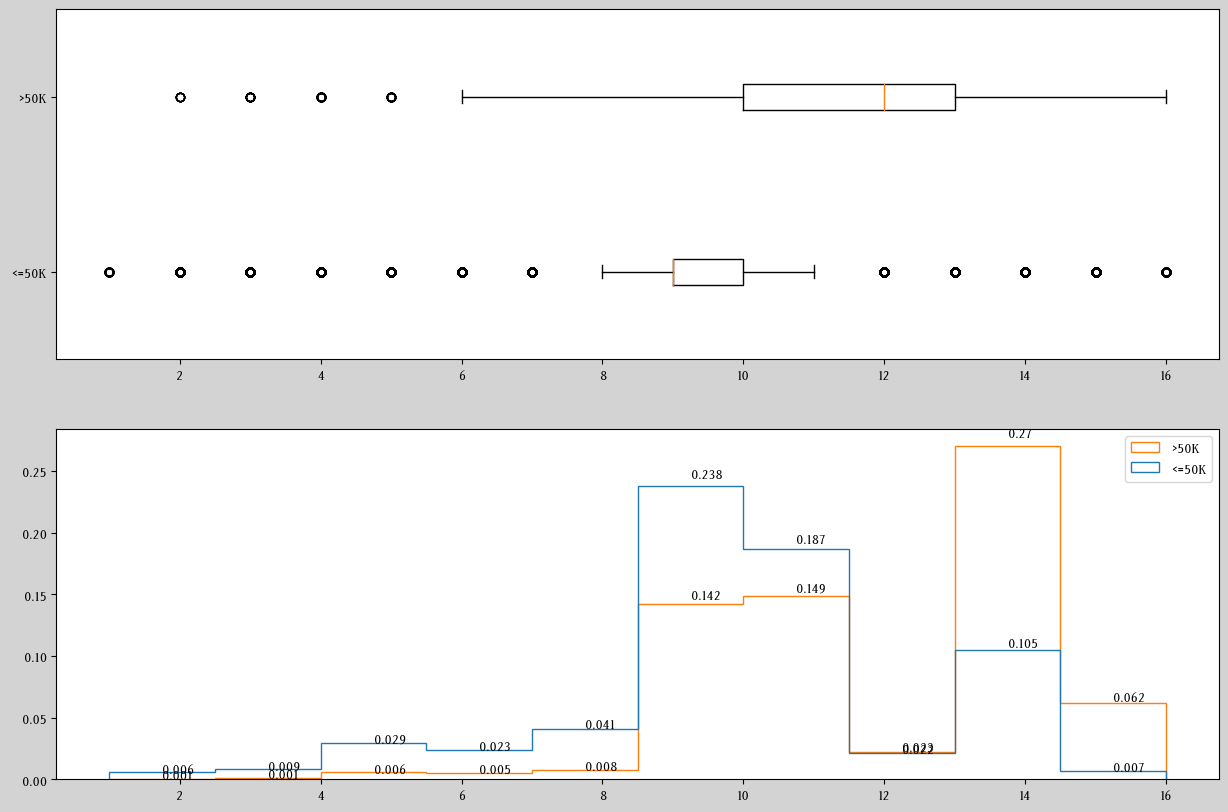

In [1]:
#### 步骤一 配置全局中文字体 配置负号ascii码展示 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

font_path = r'C:\\Users\\yaoyan\\AppData\\Local\\Microsoft\\Windows\\Fonts\\字魂45号-冰宇雅宋.ttf' #可修改全局字体
prop = fm.FontProperties(fname = font_path,weight = 'bold')
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

#### 步骤二 配置fig和axes 画几个子图 配置几个axes
fig = plt.figure(num = 1,figsize = (15,10),dpi = 100,facecolor = 'lightgray',edgecolor = 'black',frameon =True) # 改外层画布属性
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2) 

#### 步骤三 准备数据
adultdf = pd.read_csv(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\adult.csv") 
income_possible_value = adultdf['income'].unique()
income_edunm_dict = {}
for poss in income_possible_value:
    education_nm_list = adultdf[adultdf['income'] == poss]['education-num']
    income_edunm_dict[poss] = education_nm_list

#### 步骤四 分别搞出箱型图和直方图
# 箱型图
ax1.boxplot(income_edunm_dict.values(),vert =False,) # labels = income_possible_value 效果一致
ax1.set_yticks([1,2] ,income_possible_value )
# 直方图 少数会返回数据参数的绘图能力 所以直接用他给出的数值完成 数值的展示
counts, bins, patches  = ax2.hist(income_edunm_dict.values(),label = income_possible_value, histtype ='step',density =True  )#, 'barstacked', 'step', 'stepfilled'}   ) # 在这里写可确保必然对齐分组与标签关系
ax2.legend() #调用展示图例 这里不传参 在hist里面传 
for i in range(0,len(bins)-1):
    x = (bins[i]+bins[i+1])/2
    for probability_density in counts:
        y = probability_density[i]+probability_density[i] * 0.03
        text = round(probability_density[i] ,3)
        ax2.text(x,y,text)

plt.show()

In [5]:
income_edunm_dict.keys()

dict_keys(['<=50K', '>50K'])

In [ ]:
### 步骤五 理解 直方图 概率密度的算法
# 1 先完成分组 保持和 绘图工具的一致，用bins确认
def interval_func(row,i,n):
    education_nm = row['education-num']
    if education_nm >=  i    and education_nm< i+n*1:    #1-2.5
        interval = f'a.[{i},{i+n*1})'
        
    elif education_nm >= i+n*1 and education_nm< i+n*2: #2.5 - 4
        interval = f'b.[{i+n*1},{i+n*2})'
        
    elif education_nm >= i+n*2 and education_nm< i+n*3: #4-5.5
        interval = f'c.[{i+n*2},{i+n*3})'
        
    elif education_nm >= i+n*3 and education_nm< i+n*4: #5.5-7
        interval = f'd.[{i+n*3},{i+n*4})'
        
    elif education_nm >= i+n*4 and education_nm< i+n*5:   #7-8.5
        interval = f'e.[{i+n*4},{i+n*5})'
        
    elif education_nm >= i+n*5 and education_nm< i+n*6:   #8.5-10
        interval = f'f.[{i+n*5},{i+n*6})'
        
    elif education_nm >= i+n*6 and education_nm< i+n*7:   #10-11.5
        interval = f'g.[{i+n*6},{i+n*7})'
        
    elif education_nm >= i+n*7 and education_nm< i+n*8:    #11.5-13
        interval = f'h.[{i+n*7},{i+n*8})'
        
    elif education_nm >= i+n*8 and education_nm< i+n*9:   #13-14.5
        interval = f'i.[{i+n*8},{i+n*9})'
        
    elif education_nm >= i+n*9 and education_nm<= i+n*10:  #14.5-16
        interval = f'j.[{i+n*9},{i+n*10})'
    
    return interval
        
# 2 查看分组是否一致 可看到频数 和分组
adultdf['interval'] = adultdf.apply(interval_func,axis = 1,args = (1,1.5,))
adultdf['interval'].value_counts().sort_index()

# 3 基于收入群体分组 完成两组样本总数量的获取 和基于想分析的特征-受教育年限的分组来完成每组频数的获取 
# 概率     = 数据点落在 某 特性 分组 中的概率 值  = 频数（分组中的数据点个数）/ 样本总数 
# 概率密度 = 概率 / 区间宽度 
# 概率密度的意义 如果直方图的数据分组 的区间宽度不是等长 ，就代表着 数据发生的概率在不同的长度上 会受到长度的影响，就不是归一化的产物了
dfagg = adultdf.groupby(['income','interval']).agg( users = ('education-num','count') )
dfagg = dfagg.unstack(level = 0)
dfagg.fillna(0,inplace = True)
for column in dfagg.columns:
    dfagg[column] = dfagg[column] / (dfagg[column].sum() * 1.5 )  # 此处我是知道bins都是等长的1.5 正确应该乘以每个区间的宽度
dfagg  # 算出来的即为 概率密度值 保证和直方图返回的值肯定是一致的

常见确定区间宽度的方法：  不是很实用， 简单点 最大-最小 除以相对合适的分组k值即可        
n 是数据点的数量，k 是所需的组数 区间宽度: 使用数据范围除以组数来计算宽度。 
bins k 组数 = max-min / 区间宽度
1. 斯图兹-图尔曼法 (Sturges' Rule)          
𝑘=⌈log2(𝑛)+1⌉          
                       
2. 平方根法 (Square-root Choice)          
𝑘=⌈开平方根𝑛⌉          
适用于数据量较大的情况。          
                       
3. 里奇法 (Rice Rule)          
𝑘=⌈2×𝑛的1/3⌉          
             
4. 弗里德曼法 (Freedman-Diaconis Rule)          
区间宽度=2× IQR / 𝑛的1/3          
适用于数据分布不对称的情况，能够更好地反映数据的集中程度。          
                       
5. 自定义区间宽度          
根据数据的特点和分析目的，自定义区间宽度。          
例如，可以根据特定的业务需求或领域知识选择合理的值。          
                       
6. 可视化方法          
通过绘制直方图，尝试不同的区间宽度，并选择能最清晰展示数据分布的宽度。          
这种方法特别适合探索性数据分析。          

2 分类型 采用条形图

<Axes: >

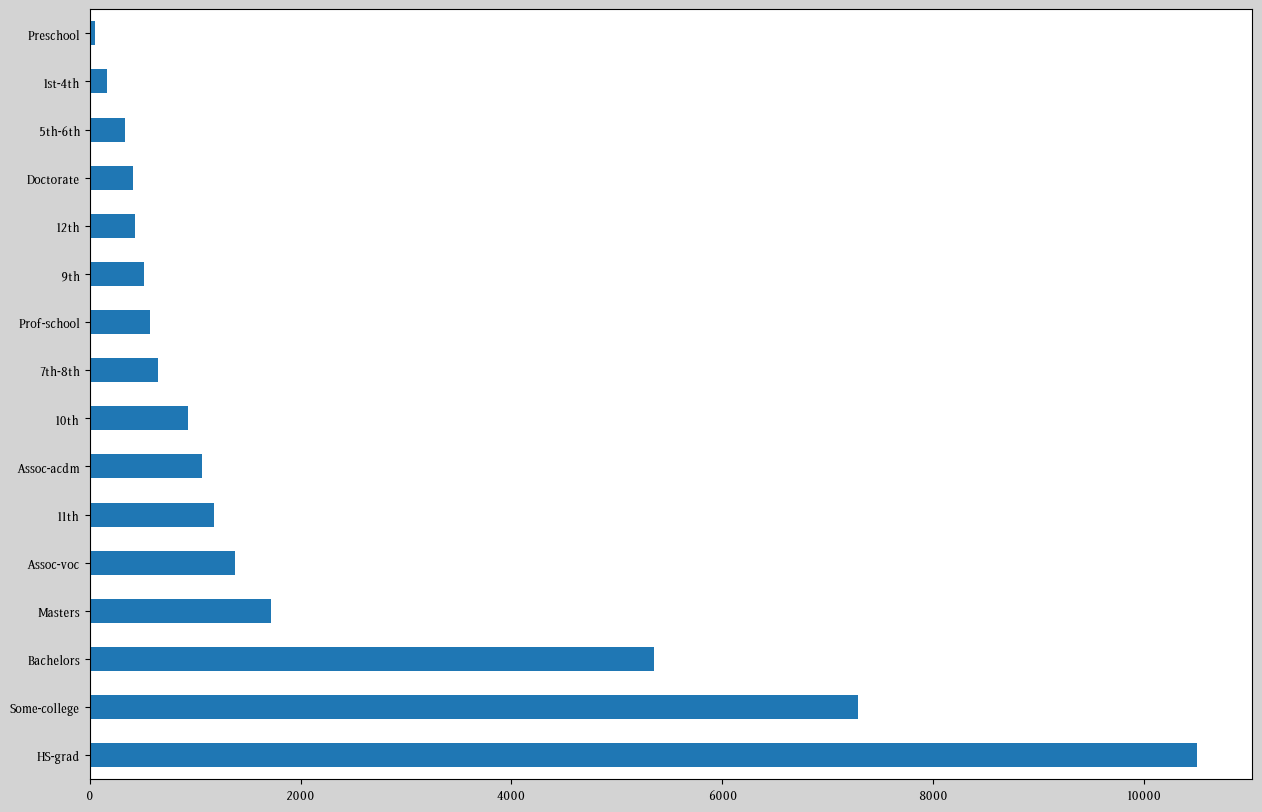

In [11]:
#### 步骤一 配置全局中文字体 配置负号ascii码展示 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

font_path = r'C:\\Users\\yaoyan\\AppData\\Local\\Microsoft\\Windows\\Fonts\\字魂45号-冰宇雅宋.ttf' #可修改全局字体
prop = fm.FontProperties(fname = font_path,weight = 'bold')
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


#### 步骤二 配置fig和axes 画几个子图 配置几个axes
fig = plt.figure(num = 1,figsize = (15,10),dpi = 100,facecolor = 'lightgray',edgecolor = 'black',frameon =True) # 改外层画布属性
ax1 = fig.add_subplot(1,1,1) 


#### 步骤三 对于此数据集中的education创建条形图
adultdf = pd.read_csv(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\adult.csv") 
adultdf['education'].value_counts().plot.barh()

###### （二）数值特征之间研究关系的方法 散点图

In [ ]:
# 传统点 用plt 一个个循环去画
import matplotlib.pyplot as plt
import pandas as pd
dfuniversity = pd.read_csv(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\Universities_imputed_reduced.csv")
fig,ax = plt.subplots(figsize=(8, 6))
ax.scatter(dfuniversity['num_appli_rec'],dfuniversity['num_appl_accepted'])

In [ ]:
# 激进点 采用seaborn的画法 
import seaborn as sns
import pandas as pd
dfuniversity = pd.read_csv(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\Universities_imputed_reduced.csv")
sns.pairplot(dfuniversity, kind='scatter', diag_kind='hist', height=2.5) # 自动采用数值型的列拿去使用


# sns.pairplot
# 输入
# data  DataFrame  Pandas DataFrame要绘制的输入数据
# hue   str        指定一个列名用于颜色编码。根据指定的分类变量为不同类别的点着色。
# vars  list       指定要绘制的变量的列表。如果未提供，默认为 DataFrame 中的所有列。
# kind  str        指定对角线和非对角线图的类型。可以是 'scatter'（默认）或 'kde'（核密度估计）。
# diag_kind  str   指定对角线部分的绘图类型。可以是 'hist'（直方图，默认）或 'kde'（核密度估计）。
# markers    str 或 list      指定散点图中使用的标记样式。
# palette    str 或 list      指定颜色调色板，影响 hue 的颜色显示。
# height     float            每个子图的高度（以英寸为单位）。
# aspect     float            子图的宽高比（宽度/高度）。



In [ ]:
dfuniversity.info()

###### （三）分类特征之间研究关系的方法 列联表

In [2]:
# 步骤一 计算出概率值 先用pd完成列联表 在换算成发生的概率
import pandas as pd
import numpy as np
import seaborn as sns
adultdf = pd.read_csv(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\adult.csv") 
dfcross = pd.crosstab(adultdf.income,adultdf.sex)
print(dfcross)
# index: 要分组的行变量。
# columns: 要分组的列变量。
# values: （可选）用于计算的值（例如，数值列）。
# aggfunc: （可选）聚合函数，默认是 len，可以用来计算其他统计量（如 sum, mean）。
# margins: （可选）是否添加总计行和列，默认为 False。
# margins_name: 总计行和列的名称，默认为 'All'。
# dropna: （可选）是否排除缺失值，默认为 True。
dfcross/np.array([dfcross.loc[: ,'Female'].sum(),dfcross.loc[: ,'Male'].sum()] ) # 广播原则
dfcross/dfcross.sum() # 广播原则

sex     Female   Male
income               
<=50K     9592  15128
>50K      1179   6662


sex,Female,Male
income,,
<=50K,0.890539,0.694263
>50K,0.109461,0.305737


<Axes: xlabel='sex', ylabel='income'>

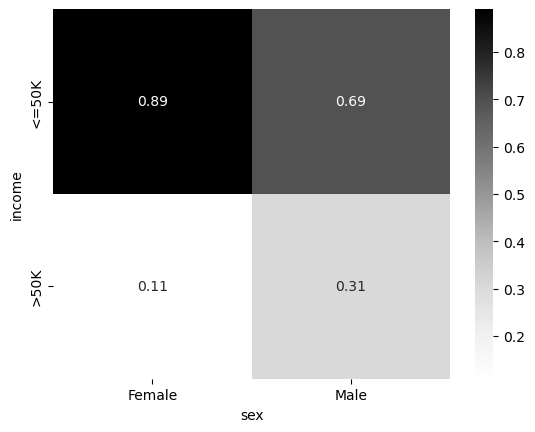

In [3]:
# 步骤二 sns绘画热力图
adultdf = pd.read_csv(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\adult.csv") 
dfcross = pd.crosstab(adultdf.income,adultdf.sex)
sns.heatmap(dfcross/dfcross.sum() ,annot = True, center = 0.5, cmap = 'Greys')
# sns.heatmap
# 输入 
# data array-like 或 DataFrame 要绘制的二维数据（如矩阵或 DataFrame）。
# center float, 可选 该参数用于设置颜色映射的中心值。当你有数据的正负值，并希望在热图上突出显示这个中心值时，
# vmin 和 vmax  float, 可选 设置热图中颜色的最小值和最大值。用于标准化颜色条（color bar），确保一致性。
# cmap  str 或 Colormap, 可选 指定颜色映射。可以使用 Seaborn 或 Matplotlib 的内置调色板，如 'viridis', 'coolwarm', 'Blues' 等。
# annot bool 或 array-like, 可选  如果为 True，则在每个单元格中显示数据值。可以使用一个数组指定每个单元格的注释内容。
# fmt   str, 可选   指定注释文本的格式。例如，'.2f' 表示保留两位小数。
# linewidths float, 可选 设置单元格之间的线宽。
# linecolor  str, 可选   设置单元格之间线条的颜色。
# cbar     bool, 可选     是否显示颜色条。默认为 True。
# square    bool, 可选   如果为 True，则热图单元格将被设置为正方形。
# mask     array-like, 可选    用于指定哪些数据单元格应被遮罩（不显示）。可以用布尔数组指定。

In [1]:
dfcross

NameError: name 'dfcross' is not defined

In [ ]:
# 步骤二 sns绘画热力图
import pandas as pd
import numpy as np
import seaborn as sns
adultdf = pd.read_csv(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\adult.csv") 
dfcross = pd.crosstab(adultdf.occupation,adultdf.race)
sns.heatmap(dfcross/dfcross.sum() ,annot = True, center = 0.075, cmap = 'Greys')

###### （四）分类特征与数值特征之间 研究关系的方法

In [ ]:
# 1 一般更为建议 将数值转化为分类特性 然后采取列联表来展示
import pandas as pd
import numpy as np
import seaborn as sns
adultdf = pd.read_csv(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\adult.csv") 
age_categ,binsedge = pd.cut(adultdf['age'],bins = 5,retbins =True, include_lowest=True, right=False,)
# include_lowest=True, right=False 经典的左闭右开

dfcross = pd.crosstab(age_categ,adultdf['race'])
sns.heatmap(dfcross/dfcross.sum(),annot = True, center = 0.25, cmap = 'Greys')
# 参数名称	类型	可选性	用途
# x	array-like	否	要分箱的输入数据（如 Pandas Series 或 NumPy 数组）。
# bins	int, sequence of scalars, pandas.IntervalIndex	是	指定分箱的边界。可以是具体的边界值（如 [0, 10, 20, 30]），也可以是分箱的数量（如 3）。
# right	bool	是	指定右侧边界是否包含在区间内。若为 True，则区间为闭区间，若为 False，则为开区间。
# labels	array-like	是	指定每个区间的标签，如果未提供，将使用区间的字符串表示。
# retbins	bool	是	返回分箱的边界，默认为 False。
# include_lowest	bool	是	若为 True，则包括最左边界的最低值。
# duplicates	str	是	处理重复边界的选项，可以设置为 'raise' 或 'drop'。
# ordered	bool	是	是否将生成的分箱视为有序的，默认为 True。

In [ ]:
new.unique()
# [[31.6, 46.2), [46.2, 60.8), [17.0, 31.6), [75.4, 90.073), [60.8, 75.4)]
# Categories (5, interval[float64, left]): [[17.0, 31.6) < [31.6, 46.2) < [46.2, 60.8) < [60.8, 75.4) < [75.4, 90.073)]

In [ ]:
# 2 特定情况下 反过来更加有利 
# 特定情况是指 字符串为序数特性 其本身具有可比性
# 此时 常见的 字符串转数值 的方式为 排序转换 （ranking transformation）
import pandas as pd
import numpy as np
import seaborn as sns
adultdf = pd.read_csv(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\adult.csv") 
education = adultdf.groupby(['education','education-num']).size()
education.sort_index(level = 1)

adultdf.plot.scatter(x = 'age' , y = 'education-num' )

在数据转换中，除了默认的排序转换（如将序数特征转换为数值），还有多种其他转换方法可以选择，具体取决于数据的性质和分析需求。以下是一些常见的转换方法：

1. 独热编码 (One-Hot Encoding)
将类别特征转换为二进制特征，每个类别独立为一个特征。适用于无序类别特征。
例如，颜色特征“红”、“蓝”、“绿”可以转换为三个二进制特征：[1, 0, 0], [0, 1, 0], [0, 0, 1]。
2. 标签编码 (Label Encoding)
将每个类别映射到一个整数值。适用于有序类别特征。
例如，教育程度“高中”、“本科”、“硕士”可以转换为 0, 1, 2。
3. 计数编码 (Count Encoding)
用每个类别在数据集中出现的频数替换该类别。这种方法保留了类别的频率信息。
例如，如果“红”出现10次，“蓝”出现15次，则分别用10和15替换。
4. 目标编码 (Target Encoding)
将类别特征替换为目标变量的均值。这种方法在分类任务中特别有用。
例如，对于二分类问题，某类别的目标编码是该类别中正类的比例。
5. 二进制编码 (Binary Encoding)
先将类别特征转换为整数，然后将整数转换为二进制形式。这种方法在类别取值较多时可以减少维度。
例如，类别“红”被编码为 0, “蓝”被编码为 1，然后转换为二进制。
6. 频率编码 (Frequency Encoding)
类似于计数编码，但使用类别的出现频率（或比例）作为编码值，而不是绝对频数。
7. 分箱 (Binning)
将数值特征分为多个区间（箱），并用箱标签替代原始数值。这可以减少噪声，提取潜在模式。
例如，将年龄分为“青年”、“中年”、“老年”。
8. 对数转换 (Log Transformation)
对数转换可以用于处理偏态分布数据，使其更接近正态分布，适用于处理大范围数值特征。
9. 标准化与归一化
标准化: 将数据转换为均值为0，标准差为1的分布，适用于大多数机器学习算法。
归一化: 将数据缩放到一个特定范围（如0到1），适用于某些对数据范围敏感的算法。

###### （五）增加可视化维度

所有国家都有完整的每年份的数据[ True]


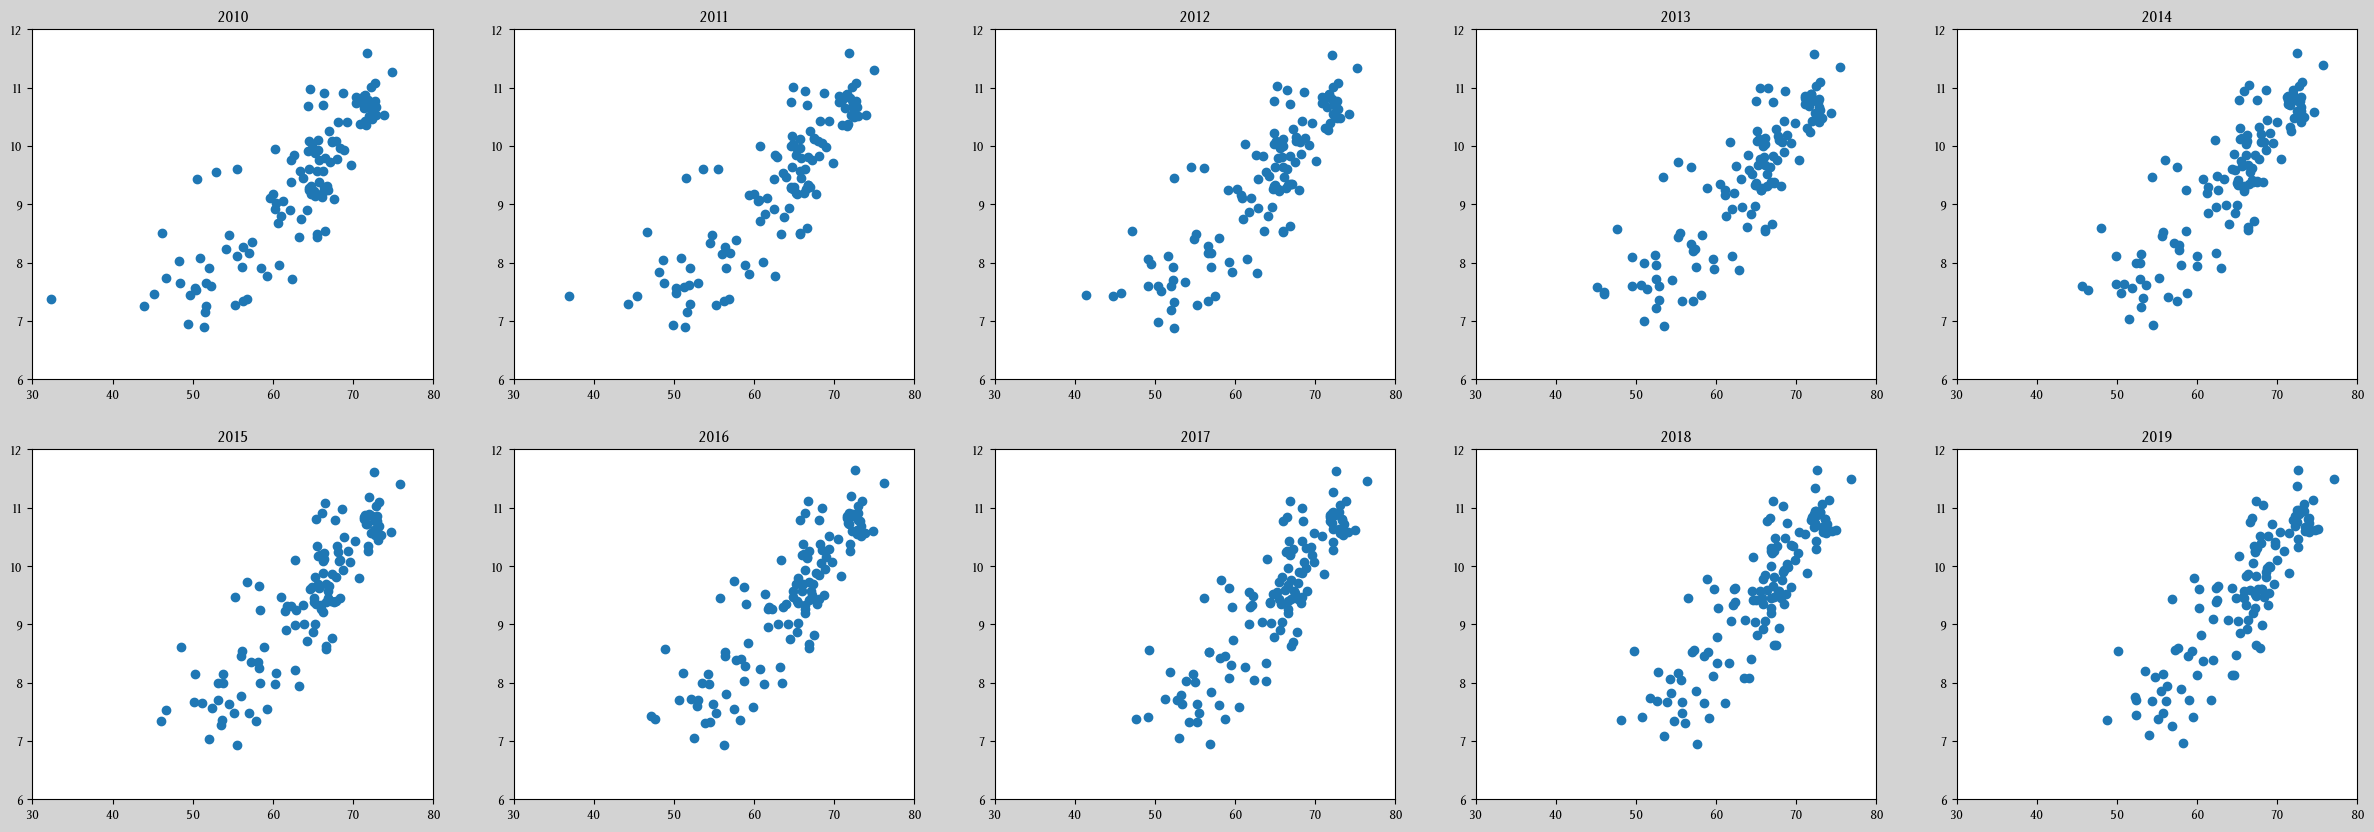

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 此数据集为国家数据集 描绘的对象为国家
countrydf = pd.read_csv(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\WH Report_preprocessed.csv") 

# 1.三维度展示 一
# 我们先展示全部国家在年份的变动中 是否 出生时的期望寿命  和 人均GDP对数值 都在往高的地方汇聚

# 1.1 了解我们的数据集 所有的年份都是 齐全的，所有的数据也是无空值的
yeardf = countrydf.groupby('Name').agg(年份计数 = ( 'year',list))['年份计数']
target_years = countrydf['year'].unique()
yeardf = yeardf.reset_index()
yeardf['has_all_years'] = yeardf['年份计数'].apply(lambda x: all(year in x for year in target_years))
print(f'''所有国家都有完整的每年份的数据{yeardf['has_all_years'].unique()}''')

# 1.2 以子图形式展示所有的年份；以散点图上单个数据点代表一个国家；散点的x代表该国家 出生时的期望寿命 ；散点的y代表该国家 人均GDP对数值 
# 前置准备
font_path = r'C:\\Users\\yaoyan\\AppData\\Local\\Microsoft\\Windows\\Fonts\\字魂45号-冰宇雅宋.ttf' #可修改全局字体
prop = fm.FontProperties(fname = font_path,weight = 'bold')
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 基于年份数量 决定绘画几行5列的图
fig = plt.figure(num = 1,figsize = (30,10),dpi = 100,facecolor = 'lightgray',edgecolor = 'black',frameon =True) # 改外层画布属性
number_of_ax = len(target_years) 
y = 5
x =  (number_of_ax + 4) // 5 # 确保正确向上

# 循环年份 不断绘画不同年份的子图
for i,year in enumerate(target_years,start = 1):
    countrydf_oneyear = countrydf[countrydf['year'] == year]
    ax = fig.add_subplot(x,y,i)
    ax.scatter(countrydf_oneyear['Healthy_life_expectancy_at_birth'], countrydf_oneyear['Log_GDP_per_capita'])
    
    # 为每个年份打标
    ax.set_title(year)
    
    # 基于最大最小值取整 用于设定刻度 
    ax.set_xlim(   [30,80]    )
    ax.set_ylim(   [6,12]     )

plt.show()

In [4]:
countrydf

,Name,Continent,year,population,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,Asia,2010,29185507.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
1,Afghanistan,Asia,2011,30117413.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
2,Afghanistan,Asia,2012,31161376.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
3,Afghanistan,Asia,2013,32269589.0,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
4,Afghanistan,Asia,2014,33370794.0,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,Zimbabwe,Africa,2015,13814629.0,3.703,7.992,0.736,53.80,0.667,-0.123,0.810,0.715,0.179
1216,Zimbabwe,Africa,2016,14030390.0,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1217,Zimbabwe,Africa,2017,14236745.0,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1218,Zimbabwe,Africa,2018,14439018.0,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212


In [ ]:
# 2 三维度展示第二种方法 用按钮替换子图 神道具
from ipywidgets import interact,widgets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

def plotyear(year):

    countrydf = pd.read_csv(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\WH Report_preprocessed.csv") 

    font_path = r'C:\\Users\\yaoyan\\AppData\\Local\\Microsoft\\Windows\\Fonts\\字魂45号-冰宇雅宋.ttf' #可修改全局字体
    prop = fm.FontProperties(fname = font_path,weight = 'bold')
    plt.rcParams['font.sans-serif'] = prop.get_name()
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    
    fig = plt.figure(num = 1,figsize = (12,8),dpi = 100,facecolor = 'lightgray',edgecolor = 'black',frameon =True) # 改外层画布属性
    countrydf_oneyear = countrydf[countrydf['year'] == year]
    ax = fig.add_subplot(1,1,1)
    ax.scatter(countrydf_oneyear['Healthy_life_expectancy_at_birth'], countrydf_oneyear['Log_GDP_per_capita'])

    # 为每个年份打标
    ax.set_title(year)

    # 基于最大最小值取整 用于设定刻度 
    ax.set_xlim(   [30,80]    )
    ax.set_ylim(   [6,12]     )
    plt.show()

interact(plotyear,year = widgets.IntSlider(2010,2010,2019,1) )

In [1]:
# 3 四维度展示 标记颜色增加大洲维度
from ipywidgets import interact,widgets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm


def plotyear(year):

    countrydf = pd.read_csv(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\WH Report_preprocessed.csv") 
    
    # 准备额外的 列 指定大洲的色彩
    color_dict = {'Asia': 'r',
 'Europe': 'g',
 'Africa': 'b',
 'South America': 'c',
 'Oceania': 'm',
 'North America': 'y',
 'Antarctica': 'k'}
    
    countrydf['color'] = countrydf['Continent'].map(lambda continet:color_dict[continet])
    
    font_path = r'C:\\Users\\yaoyan\\AppData\\Local\\Microsoft\\Windows\\Fonts\\字魂45号-冰宇雅宋.ttf' #可修改全局字体
    prop = fm.FontProperties(fname = font_path,weight = 'bold')
    plt.rcParams['font.sans-serif'] = prop.get_name()
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    
    fig = plt.figure(num = 1,figsize = (12,8),dpi = 100,facecolor = 'lightgray',edgecolor = 'black',frameon =True) # 改外层画布属性
    countrydf_oneyear = countrydf[countrydf['year'] == year]
    ax = fig.add_subplot(1,1,1)
    ax.scatter(countrydf_oneyear['Healthy_life_expectancy_at_birth'], countrydf_oneyear['Log_GDP_per_capita'], c =countrydf_oneyear['color'] )
    
    # 为每个年份打标
    ax.set_title(year)

    # 基于最大最小值取整 用于设定刻度 
    ax.set_xlim(   [30,80]    )
    ax.set_ylim(   [6,12]     )
    plt.show()

interact(plotyear,year = widgets.IntSlider(2010,2010,2019,1) )


interactive(children=(IntSlider(value=2010, description='year', max=2019, min=2010), Output()), _dom_classes=(…

<function __main__.plotyear(year)>

In [10]:
# 3 四维度展示 标记颜色增加大洲维度
from ipywidgets import interact,widgets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm


def plotyear(year):

    countrydf = pd.read_csv(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\WH Report_preprocessed.csv") 
    
    # 准备额外的 列 指定大洲的色彩
    color_dict = {'Asia': 'r',
 'Europe': 'g',
 'Africa': 'b',
 'South America': 'c',
 'Oceania': 'm',
 'North America': 'y',
 'Antarctica': 'k'}
    
    countrydf['color'] = countrydf['Continent'].map(lambda continet:color_dict[continet])
    countrydf.sort_values(by = 'population',ascending =False, inplace = True)
    
    font_path = r'C:\\Users\\yaoyan\\AppData\\Local\\Microsoft\\Windows\\Fonts\\字魂45号-冰宇雅宋.ttf' #可修改全局字体
    prop = fm.FontProperties(fname = font_path,weight = 'bold')
    plt.rcParams['font.sans-serif'] = prop.get_name()
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    
    fig = plt.figure(num = 1,figsize = (12,8),dpi = 100,facecolor = 'lightgray',edgecolor = 'black',frameon =True) # 改外层画布属性
    countrydf_oneyear = countrydf[countrydf['year'] == year]
    ax = fig.add_subplot(1,1,1)
    ax.scatter(countrydf_oneyear['Healthy_life_expectancy_at_birth'], countrydf_oneyear['Log_GDP_per_capita'], 
               s = countrydf_oneyear['population']/200000,
               c = countrydf_oneyear['color'] )
    
    # 为每个年份打标
    ax.set_title(year)

    # 基于最大最小值取整 用于设定刻度 
    ax.set_xlim(   [30,80]    )
    ax.set_ylim(   [6,12]     )
    plt.show()

interact(plotyear,year = widgets.IntSlider(2010,2010,2019,1) )


interactive(children=(IntSlider(value=2010, description='year', max=2019, min=2010), Output()), _dom_classes=(…

<function __main__.plotyear(year)>

In [9]:
countrydf.sort_values??

###### （六）显示和比较趋势

### 六、定量的分析出是否相关

######  理解什么叫样本，什么叫总体 
总体 (Population)          
定义：总体是指研究对象的全体集合，包含所有可能的观察或数据点。例如，某个国家的所有居民、所有生产的产品、所有学生的成绩等。       
特征：总体通常用符号 𝑁 表示，并且可能是有限的（如某个班级的学生）或无限的（如所有人的身高）。       

样本 (Sample)       
定义：样本是从总体中随机选取的一部分数据，通常用符号 𝑛 表示。样本用于推断总体的特征，因为直接研究总体往往不切实际或不可能。       
特征：样本应该具有代表性，以便通过样本的统计量（如均值、方差等）来合理估计总体的相应参数。       
       
样本与总体的关系       
代表性：样本应该是随机抽取的，以确保其能够代表总体。如果样本选择偏差，可能导致对总体的错误估计。       
统计推断：通过对样本进行分析，可以推断总体的特征。这就是统计推断的核心，包括估计（如点估计和区间估计）和假设检验。       
参数与统计量：总体特征称为参数（例如总体均值 𝜇  总体方差 𝜎2），而样本特征称为统计量（例如样本均值 ˉ𝑥 、样本方差 𝑠2）       
样本量：会影响推断的准确性。较大的样本量通常会提供更准确的总体估计。       
误差：样本估计总体参数时，会存在抽样误差。这个误差可以通过增加样本量或使用适当的抽样方法来减小。       

###### 假设检验 中t检验 z检验适用的场景       
1. t 检验的适用场景     
样本较少: 当样本数量小于 30 时，t 检验更为合适，因为样本均值的分布可能不符合正态分布。
总体标准差未知: 当你不知道总体标准差时，t 检验是合适的选择，即使样本数量较大时也可以使用。
2. z 检验的适用场景         
样本较大: 当样本数量大于 30 时，z 检验通常可以使用，因为根据中心极限定理，样本均值的分布趋向于正态分布。
总体标准差已知: z 检验的一个重要前提是你必须知道总体标准差。
3. 在样本较大且标准差未知的情况下            
如果你的样本数量较大（如 n > 30），但不知道总体标准差，使用 t 检验仍然是合适的。大样本的情况下，t 检验的结果与 z 检验非常接近，因此可以放心使用 t 检验。         
4. 总结            
使用 t 检验时要考虑样本大小和是否已知总体标准差。通常情况下，如果样本较小且标准差未知，使用 t 检验；如果样本较大且标准差已知，可以使用 z 检验。        
在实际操作中，尤其是样本较大时，使用 t 检验也是常见的做法。                   

In [ ]:
# 科普数学知识
import pandas as pd
import scipy.stats as stats
import numpy as np

# 一、样本方差 s平方 总体方差 𝜎平方
# 用法：衡量数据的离散程度，计算每个数据点与均值的差的平方的平均值。
# 样本方差 =（任意样本中的元素x - 抽样样本mean）的平方相加 除以 样本数量 -1
# 总体方差 = (总体中元素x -总体mean)            的平方相加 除以 样本数量
list1 = [1,3,4,5,6,19,20,31]
sample_mean = np.mean(list1)
sample_n    = len(list1)
sum([(x - sample_mean)**2 for x in list1])/ (sample_n -1) == np.var(list1,ddof = 1 ) # 是总体就不需要写1 直接写0 即除以n而非除以 n-1

# 二、样本标准差s 总体标准差𝜎
# 用法：提供了与原数据相同单位的离散程度度量，便于理解和比较。
# 标准差 = 方差开平方     # 因为方差为了避免左边和右边的离散互相抵消，是做了乘积的 ，回到原单位必须开平方
np.sqrt(sum([(x - sample_mean)**2 for x in list1])/ (sample_n -1)) == np.std(list1,ddof = 1)

# 三、标准误 样本均值的标准差 SE  Standard Error of the Mean
# 用法：用来衡量样本均值与总体均值之间差异的一个指标，反映了样本均值的变异程度。
# 算法一 样本均值的标准差 = 样本均值的方差**0.5 = 总体的方差/ 样本的大小 **0.5 = 总体的标准差/ n**0.5  = 𝜎 / np.sqrt(n) 
# 算法二 不知道总体标准差 𝜎 用 s 替代 SE = s / np.sqrt(n) 
# 上述公式 基于  Var(X_mean) = 𝜎 ** 2 / n 获取 原理看下图

# 四、标准误产生原因   中心极限定理  样本均值分布（sampling distribution of the sample mean）
# 1. 标准误产生原因 
# 总体中可多次抽样 因为抽样导致的损失 会使得总体平均值和 样本平均值 之间存在一个偏移 产生标准误
# 多样本均值  构成的   样本均值分布（sampling distribution of the sample mean） 存在一个概念

# 2. 中心极限定理 
# 根据中心极限定理，当样本量足够大时，样本均值的分布趋近于正态分布，即使总体本身的分布不是正态的。
# 它可用在 置信区间评估、样本比例、方差、回归分析等多个领域的应用

In [ ]:
# 插图  Var(X_mean) = 𝜎 ** 2 / n
from IPython.display import Image, display
display(Image(filename=r"D:\1-script\3-PYTHON\image存储jupyter在用的图片存放于此\样本平均值的方差 = 总体的方差除以样本的数量.png"))

In [ ]:
# 科普数学知识
import pandas as pd
import scipy.stats as stats
import numpy as np

# 五、中心极限定理 应用一  总体参数置信区间的算出
# （一）置信水平 与显著性 与对应的临界z值/t值
# 置信水平 代表期望有 90%、95% 或 99% 的置信区间能够包含真实的总体参数。
# 其对应的 z 值（对于大样本）或 t 值（对于小样本）可以从标准正态分布表或 t 分布表中查找。这是临界的 独立样本的假设检验中的统计量和他是一个比大小的关系
# 显著性 用于判断统计检验结果是否显著的阈值。它表示在原假设为真的情况下，拒绝原假设的概率。他 = 1-置信水平 他在假设检验中比大小的对象是p_value

# （二）python算出 临界t值（样本小于30的时候 t分布） 和 z值（正态分布）
# 分位数函数 (percent point function, PPF)  它允许我们从给定的概率值获取相应的临界 t/z 值。
# 双尾检验 用于算出两侧的面积 单位检验就检查一侧的面积
# 自由度 degrees of freedom 描述t分布的形状 算法一般为 n - 1 换言之 样本数量越少 则自由度越小 相应的 t 分布的尾部会变得更厚
#         那么为什么要-1    每个均值消耗一个自由度 估算总体和样本 则只有只有1个样本参与进去 自由度只会-1 合并n个样本 就是-n
# 临界t值
sample_n = 25
alpha = 0.05
degrees_of_freedom = sample_n -1 
critical_t = stats.t.ppf(1 - alpha/2, degrees_of_freedom)  # 使用 1−α/2 是为了获取对应于置信区间左右两侧的临界值。这是构建双尾置信区间的标准做法。
print(f'双尾检验的临界 t值：{critical_t}') # 双尾检验
# 临界z值
critical_z = stats.norm.ppf(1 - alpha/2) # 这里也是双尾检验 如果是单尾检验就是 1 - alpha 做参数了
print(f'双尾检验的临界 z值: {critical_z}')

# 统计量 t/z 基于两份样本的平均值相减/ 两份样本统合的标准误 完成标准化计算得到
# (x1_mean - x2_mean) / SEcombined = np.sqrt(x1_sem **2  + x2_sem**2)

# （三）误差边缘 MOE/ME MARGIN OF ERROR
# 在另一种应用中 独立样本的假设检验中 样本1的平均值-样本2的平均值 / 两个样本的标准误的合并 可以算出 统计量的t/z
# 在总体参数-总体平均值的估算中 我们可以认知到  他其实就是  总体的平均值 - 样本的平均值 / 单一样本的标准误 标准化后的值 
# 所以误差的绝对值边缘 ME =  t/z * SE 也就是完成了逆向标准化

# （四）置信区间 即总体参数 总体的平均值落入的区域
# 置信水平 = 样本的平均值 +- ME

# 中心极限定理 应用二  假设检验
# （一）理解总体参数 是总体和样本 的比较 假设检验则是 两个独立样本之间的比较
# （二）比较对象
#  比较 p_value < α 比较 abs(t/z 统计量) > 临界t/z值  则拒绝原假设，表明结果具有统计显著性
#  z 作为 衡量样本均值之间的差异的标准化值。 
#  p 值是通过查找 z 统计量在标准正态分布中的位置得出的 事件发生的概率
#  这两个比较对象存在换算关系
# （三）转化关系函数
# 在总体参数预估中 你是基于自己期望的置信水平 拿到显著性α 之后基于正态分布表或者python的分位数PPF 算出t/z值后进一步算出误差边缘 算出置信区间
# 在假设检验中     
# 你依旧为自己设定了显著性 然后你是通过样本之间的标准化t/z 用sf （Survival Function） 或者 cdf （Cumulative Distribution Function）反向算出的p_value 拿到的概率值进行比较

# 1.  累积分布函数（CDF）
# 定义: CDF（Cumulative Distribution Function）表示随机变量小于或等于某个值𝑥的概率：
# F(x)=P(X≤x)
# python写法：见后续的案例独立假设
# 功能: CDF 用于计算特定值以下的概率。它提供了从随机变量到概率的映射。

# 2. 生存函数（SF）
# 定义: SF（Survival Function）表示随机变量大于某个值𝑥的概率：
# 𝑆(𝑥)=𝑃(𝑋>𝑥)=1−𝐹(𝑥)
# python写法：见后续的案例独立假设
# 功能: SF 计算特定值以上的概率。它可以被视为 CDF 的补充，表示“生存”或“存活”的概率。

# CDF 和 SF:
# 功能相似，都是用于获取概率信息。CDF 计算某个值以下的概率，而 SF 计算某个值以上的概率。
# 它们之间的关系是： 𝑆𝐹(𝑥)=1−𝐶𝐷𝐹(𝑥)

# 3.分位数函数（PPF）python写法查看上面
# 定义: PPF（Percent Point Function）是 CDF 的反函数，表示给定概率 𝑝 的分位数值：
# Q(p)=F ** −1 (p)
# 功能: PPF 从概率到随机变量值的映射。它用于确定特定概率下的值，例如获取 95% 的分位数。

In [ ]:
# 理解完上述的数学知识后 我们进一步学习定量的特征相关分析
# 我们还是拿1中 分析的受教育年限 和 收入这两个特征 继续理解
import pandas as pd
import scipy.stats as stats
import numpy as np

# 定量分析方法一 做相关性分析
adultdf = pd.read_csv(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\adult.csv") 
adultdf['income_num'] = adultdf['income'].apply(lambda x: 0 if x == '<=50K' else 1)
print(adultdf[['education-num','income_num']].corr())
# 局限性 不能用在 分类型数据 和 数值型数据做分析 #解决方案 直接编码为0,1 虽然可以强行计算 但是
# 皮尔逊相关系数适用于连续型数据，它衡量的是线性关系。如果一个变量是二元的（如 0 和 1），而另一个变量是连续的，
# 使用皮尔逊相关系数可能并不合适，因为它无法有效捕捉二元变量与连续变量之间的关系。

# 定量分析方法二  斯皮尔曼等级相关系数  
print(stats.spearmanr(adultdf['education-num'] , adultdf['income_num'] ))

# 定量分析方法三  方差分析 (ANOVA) F检验  逻辑回归方式 主成分分析法 
f_stat, p_value = stats.f_oneway(adultdf['education-num'] , adultdf['income_num'] )
print(f'F 统计量: {f_stat:.2f}')
print(f'p 值: {p_value:.4f}')

# 定量分析方法四 
# 假设检验1  
group1 = adultdf[adultdf['income'] == '<=50K']['education-num']
group2 = adultdf[adultdf['income'] == '>50K']['education-num']
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f't-statistic: {t_stat}, p-value: {p_value}') 

# 假设检验2
# 总体的平均值、标准差（𝜎）、方差（𝜎**2）
total = adultdf['education-num']
total_mean = total.mean()
total_std  = total.std(ddof=0)
total_var  = total_std**2
print(f'总体的平均值为{total_mean}')
print(f'总体的标准差为{total_std}')
print(f'总体的方差为{total_var}')

# 特征抽样的样本 的均值
mean1 = group1.mean()  
mean2 = group2.mean()  
print(f'样本1的平均值为{mean1}')
print(f'样本2的平均值为{mean2}')

# 特征抽样的样本 的标准差 即s
std1 = group1.std(ddof=1)  # 收入小于 50K 的标准差，使用样本标准差 即s
std2 = group2.std(ddof=1)  
print(f'样本1的标准差为{std1}')
print(f'样本2的标准差为{std2}')

# 特征抽样的样本大小
n1 = len(group1) 
n2 = len(group2) 
print(f'样本1的容量为{n1}')
print(f'样本2的容量为{n2}')

# 特征抽样的标准误 定义：标准误是样本均值的标准差，用于衡量样本均值作为总体均值的估计的精确性。它反映了样本均值在不同样本之间的变异程度。 
# 算法一  样本均值的标准差 = 样本均值的方差**0.5 = 总体的方差/ 样本的大小 **0.5 = 总体的标准差/ n**0.5
# 适用情况 ：已知总体标准差
sem1_method1 = total_std / np.sqrt(n1)
sem2_method1 = total_std / np.sqrt(n2)
print(f'样本1的算法1标准误为{sem1_method1}')
print(f'样本2的算法1标准误为{sem2_method1}')

# 算法二 将 算法一的 总体的标准差 替换为 样本的标准差  就会产生 s/ np.sqrt(n)的公式 
# 使用情况：不知道总体的方差 
sem1_method2 = std1 / np.sqrt(n1)
sem2_method2 = std2 / (n2 ** 0.5)  
print(f'样本1的算法1标准误为{sem1_method2}')
print(f'样本2的算法1标准误为{sem2_method2}')

# 特征抽样的 z统计量 即将两个样本组 之间的平均值误差 平摊到 标准误的标准程度  从而便于后续的正态分布表比较 是概率累计算出的值
# 存在两个样本 两个样本的标准误都贡献了 所以要算出合并的标准误
# 合并的标准误 = np.sqrt(sem1**2 + sem2**2) 这只是方法之一 可能 stats.ttest_ind算法在这里有差别
# 自由度的算法
z_stat =  (mean1 - mean2) / np.sqrt(sem1_method1**2 + sem2_method1**2) 
t_stat =  (mean1 - mean2) / np.sqrt(sem1_method2**2 + sem2_method2**2) 
print(f'z统计量{z_stat}')
print(f't统计量{t_stat}')


# 特征抽样的自由度计算 仅限于采取t检验时获取
degree_of_freedom = n1 + n2 -2  # 对于独立检验 
# 自由度的计算公式中减去的 2 是因为我们需要估计两个样本均值，每个均值消耗一个自由度。
# 自由度的变化与样本大小直接相关：每增加一个样本，自由度增加 1。

# 基于你的 stat 和 自由度算出 显著性水平比较值 p_value
# z统计量 换算 概率 
p_value_z = 2 * stats.norm.sf(abs(z_stat))
print(f'z统计量换算出来的概率p值为{p_value_z}')

# t统计量 换算 概率 
p_value_t1 = 2 * (1 - stats.t.cdf(abs(t_stat),degree_of_freedom))  # 双尾检验 等于0意味着无限接近于 0.01
p_value_t2 = 2 * stats.t.sf(abs(t_stat), degree_of_freedom) # 双尾检验 等于0意味着无限接近于 0.01
print(f't统计量换算出来的概率p值为{p_value_t1}')
print(f't统计量换算出来的概率p值为{p_value_t2}')


# 双尾检验 一般 比较的α为0.05 即检查面积的2侧 单位就是检查1侧
# 我们原定的假设 H0 为 教育年限 和 收入直接无关系 保持一种中立的态度
# 备择假设 𝐻1 代表 教育年限 和 收入直接存在关系 仅在数据支持的情况下 才会走向这个不中立的假设
# 因为中心极限定理 导致的正态分布遵从特性 才允许我们 采取 检查两个独立样本的标准误的方式 来换算出事件触发的概率 p值
# z 作为 衡量样本均值之间的差异的标准化值。 p 值是通过查找 z 统计量在标准正态分布中的位置得出的 事件发生的概率
# 显著性的α 已知为 0.05  因为 p 已知为 0 < 0.05  代表样本发生的概率在原假设下不太可能发生 
# 这时，z 统计量的值通常会大于对应的正临界值（对于单尾检验）或落在临界区间外（对于双尾检验 对于z值 0.5的显著性，即为 +-1.96）。


# 上述多个方法返回的多个值 之间的认知
# 斯皮尔曼相关系数（Statistic）: 0.33 表示教育年限与收入之间存在弱正相关。
# p 值: 0.0 表示这种相关性在统计上是显著的，几乎不可能是偶然的结果。
# 实际上，p 值为 0 通常表示计算结果非常小，可能是由于样本量较大，导致即使是微弱的相关性也表现为显著。
# 尽管相关性不强，但它的显著性提示我们值得关注这两个变量之间的关系。

In [ ]:
import numpy as np

# 假设我们有一个特征"type"，它有两种取值：A 和 B
# 根据 type 特征对样本进行分组
type_A = np.array([5.2, 6.1, 4.9, 5.5, 5.8, 6.0, 5.3, 5.7])
type_B = np.array([4.8, 5.2, 5.0, 4.9, 5.1, 5.3, 4.7, 5.0])

# 执行 F 检验
from scipy.stats import f_oneway
f_stat, p_value = f_oneway(type_A, type_B)

# 输出结果
print(f'F 统计量: {f_stat:.2f}')
print(f'p 值: {p_value:.4f}')

### 五、matplotlib rcParams
（一）何为rcParams （二）rcParams作用于字体 （三）rcParams正确展示负号

（一）何为rcParams 

In [ ]:
# rc run commands 执行全局命令 
# 1. 它允许用户在绘图时定义和修改各种默认参数，进而影响全局图形的外观和行为，如字体、线条样式、颜色、图形尺寸等。
# 2. 它本质也是一个默认参数字典 无需设置全部参数 亦可正常展示图片的根源
# 3. 它更多的详情请用如下语句查看

plt.rcParams??

（二）rcParams作用于字体

In [ ]:
# font.family: 设置字体系列（如 'serif', 'sans-serif', 'monospace'）
# font.sans-serif: 指定 sans-serif 字体的具体字体名称。

# 直接字符串赋值
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'    

# 通过加载字体 获取名称的方式赋值
from matplotlib import font_manager as fm
font_path =  fm.findSystemFonts()[0]
prop = fm.FontProperties(fname = font_path)
plt.rcParams['font.sans-serif'] = prop.get_name()

（三）rcParams正确展示负号

In [ ]:
# 默认情况下，Matplotlib 使用 Unicode 字符来表示负号（例如，使用 −，其 Unicode 编码为 U+2212），
# 而不是 ASCII 字符（如 -，其 ASCII 编码为 U+002D）。
# 特请情况  ASCII 字符 更易正确展示 发现-号 不正确展示可用这行代码修复 
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [ ]:
sample_std

In [ ]:
import numpy as np
import scipy.stats as stats

# 数据
data = [
    72.5625, 66.875, 67.875, 64.9375, 66.75, 63.4375, 64.125, 66.9375,
    64.625, 67.5625, 70, 68.625, 65.1875, 65, 60.375, 67.5, 67.9375,
    81.125, 82.75, 76.1875, 74, 80.546875, 78.5, 77.125, 75.6875,
    73.4375, 72.75, 71.25, 68.4375, 64.9375, 64.875, 70.5625, 67.4375,
    66.5625, 66, 67.625, 64.9375, 63.25, 62.875, 64.875, 63.25,
    63, 67.25, 64, 66.0625, 64.75, 62.25, 66.0625, 63.5, 65.125,
    70.875, 69.5, 74.625, 72.25, 72.375, 69.5, 64.5, 66.75, 
    65.4375, 62.875, 61.75, 63.4375, 65.125, 67.25
]

# 计算样本均值和标准差
mean = np.mean(data)
std_dev = np.std(data, ddof=1)  # 使用样本标准差
n = len(data)

# 置信水平
confidence_level = 0.95
alpha = 1 - confidence_level

# 计算 t 值
t_critical = stats.t.ppf(1 - alpha / 2, df=n - 1)

# 计算置信区间
margin_of_error = t_critical * (std_dev / np.sqrt(n))
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

mean, std_dev, t_critical, confidence_interval

In [ ]:
mean

In [ ]:
import numpy as np
import scipy.stats as stats

# 示例数据
data = np.array([12, 15, 14, 10, 18, 20, 22, 21, 19, 16])

# 计算样本均值和标准差
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)  # 使用样本标准差
n = len(data)
df = n - 1  # 自由度

# 选择置信水平
confidence_level = 0.95
alpha = 1 - confidence_level

# 查找t值
t_value = stats.t.ppf(1 - alpha / 2, df)

# 计算置信区间
margin_of_error = t_value * (sample_std / np.sqrt(n))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"样本均值: {sample_mean:.2f}")
print(f"置信区间: {confidence_interval}")

In [ ]:
ax1.boxplot??

### 一、seaborn 绘图库

In [ ]:
path = r"C:\Users\yaoyan\Downloads\Hands-On-Data-Preprocessing-in-Python-main\Hands-On-Data-Preprocessing-in-Python-main\Chapter03\Customers Dataset.xlsx"
import pandas as pd
customer_df = pd.read_excel(path)
customer_df

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x='Last week number of visits',
           y='Last week Purchase $',data=customer_df)
plt.show()

In [ ]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(customer_df['Last week number of visits'], customer_df['Last week Purchase $'])

# 2. 输出线性回归公式
print(f"线性回归公式: y = {slope:.2f}x + {intercept:.2f}")

In [ ]:
# 导入并简写为sns，名字来源于一个美剧
import seaborn as sns

# 优先设置灰色网格和中文字体展示方式
sns.set_style('whitegrid' ,{'font.sans-serif':['SimHei']})
#  darkgrid
# dark
# white
# ticks
# 调用sns的散点图
sns.scatterplot(x = df1['面积'],y = df1['总价'])
plt.axis([0,750,0,7500])

In [ ]:
# seaborn自带分析，如下图根据数据自动去画出了置信度的黑线
print(sns.barplot(x = '建筑结构',y = '总价',data = df1))

In [ ]:
# seaborn自动给与维度颜色，hue参数增加更多特征进去，增加了建筑类型维度
sns.scatterplot(x = '面积',y = '总价',hue = '建筑类型',data = df1)

In [ ]:
# 优化边框
sns.despine(left = True ,offset = 10) # 去掉轴线，通过参数指定去除哪根轴线，通过offset指定偏移轴线

In [ ]:
# 优化配色
# 查看系统默认的调色板
sns.color_palette()

# 给出名称查看预制的调色板，给出数字生成更多梯度
sns.color_palette('Blues',15)

#设置调色板
sns.set_palette(sns.color_palette('Blues',4))
sns.set_palette('Blues',4)

In [ ]:
# 优化子图排列 部分图表不支持子图
# 划分子图 subplots返回三个参数，ax123,分别代表一个区域；fig代表整个区域，也代表着整体操作，比如整体去除边框线写sns.despine(fig)
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4)) # 1代表行数，3代表列数，figsize = (16,4)代表16英寸的宽，4英寸的高

# 生成图片给出ax参数
sns.despine(fig)
sns.scatterplot(x = '面积',y = '总价',data = df1,ax = ax1)
sns.barplot(x = '建筑类型',y = '面积',data = df1,ax = ax2)
sns.scatterplot(x = '建筑结构',y = '总价',data = df1,ax = ax3)

### 一、matplotlib 绘图库
######  课后习题

In [ ]:
# 下载并读取文件完成以下需求：
import pandas as pd
df1 = pd.read_csv(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\data30.csv")
df1.info()
# 1. 图表背景为暗色无网格风格；
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei'] # 变更默认字体
plt.rcParams['axes.unicode_minus'] = False # 多语种情况下正常展示负号“-”
sns.set_style('darkgrid',{'font.sans-serif':['SimHei']})
# 2. 绘制散点图，展示浪高上限与风速上限的数据；
sns.scatterplot(x = '浪高上限',y = '风速上限',hue = '浪向' ,data = df1)
# 3. 根据浪向设置图例。

In [ ]:
# 下载并读取文件完成以下需求：
import pandas as pd
df1 = pd.read_csv(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\data30.csv")
df1.info()
# 1. 使用预置蓝色调色盘，包含 11 个颜色；
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei'] # 变更默认字体
plt.rcParams['axes.unicode_minus'] = False # 多语种情况下正常展示负号“-”
sns.set_style('ticks',{'font.sans-serif':['SimHei']})
sns.set_palette(sns.color_palette('Blues',11))

# 2. 绘制条形图，展示不同风向的平均浪高上限；
sns.barplot(x = '风向',y='浪高下限',data = df1)
# 3. 隐藏轴线。
sns.despine()


In [ ]:
# 下载并读取文件完成以下需求：
# 读入数据
import pandas as pd
df1 = pd.read_csv(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\data30.csv")
df1.info()

# 准备绘图库
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei'] # 变更默认字体
plt.rcParams['axes.unicode_minus'] = False # 多语种情况下正常展示负号“-”
sns.set_style('ticks',{'font.sans-serif':['SimHei']})
sns.set_palette(sns.color_palette('Blues',11))
sns.set_palette

# 1. 将画布划分2行2列的绘图空间，长15，宽9；
s = plt.subplots(2,2,figsize = (15,9)) # 返回的是元祖嵌套数组，所以切片的细致点
fig = s[0]
ax1 = s[1][0][0]
ax2 = s[1][0][1]
ax3 = s[1][1][0]
ax4 = s[1][1][1]


# 2. 绘制4个条形图分别展示：航线与平均浪高上限、平均风速上限，浪向与平均浪高上限、平均风速上限；
# 准备聚合的数据
dfs1 = df1.groupby('航线')[['浪高上限','风速上限']].mean()
dfs2 = df1.groupby('浪向')[['浪高上限','风速上限']].mean()

#写在外面或者用color参数写在里面都会改变整体调色盘
sns.set_palette('Oranges',2)
sns.barplot(x = dfs1.index,y = '浪高上限',data = dfs1,ax = ax1)
sns.barplot(x = dfs1.index,y = '风速上限',data = dfs1,ax = ax2)

sns.barplot(x = dfs2.index,y =  '浪高上限',data = dfs2,ax = ax3,color = sns.set_palette('Greens',11))
sns.barplot(x = dfs2.index,y =  '风速上限',data = dfs2,ax = ax4,)
sns.color_palette()

# 3. 隐藏轴线，并且向外侧偏移2个像素距离。
sns.despine(fig,offset = 2)


In [ ]:
sns.color_palette('Reds',10)

### 二、图表作用于分析
######  1、汇总排名 先分组汇总，再排序切片

In [ ]:
# 案例
import pandas as pd
df = pd.read_csv(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\国际卖场数据2011-2015.csv")
df1 = df[['订单号','国家地区','商品门类','总额']]
# 查看具体几个国家，几类商品
df1['国家地区'].unique() # 自动去重
df1['商品门类'].unique() # 自动去重

# 商品门类翻译为中文
df1.insert(3,'商品类',df1['商品门类'].replace(['Office Supplies','Furniture','Technology'],['办公','家具','科技']))
df1['商品类'].unique() # 自动去重

# 销量最高的前5国家 只有一个序列自然是series，name就是列名，但是套上一个[]就像numpy里面一样生维度了
top5 = df1.groupby('国家地区')[['总额']].sum().sort_values(by = '总额',ascending = False).round(1)[:5]

# 获取他的index去重拉去布尔切片拿到明细数据
df[df['国家地区'].isin(top5.index.unique())]

### 二、图表作用于分析
######  课后习题

In [ ]:
# 课后习题1
# 下载并读取国际卖场数据
import pandas as pd
import numpy as np

df = pd.read_csv(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\国际卖场数据2011-2015.csv")
df.info()
# 1. 使用切片找出销量排名在中间的5个国家地区。
# np.count_nonzero(df['订单号'].unique())
# 唯一值判断方式
# df.groupby(['订单号','商品编号']).aggregate({'订单号':'unique'})
dfs = df.groupby(['国家地区']).aggregate({'订单号':'nunique'}).sort_values(by = '订单号',ascending = 0).reset_index()
length = len(dfs.index)//2
dfs.iloc[length-2:length+3,0]

In [ ]:
# 课后习题2
# 下载并读取国际卖场数据
import pandas as pd
import numpy as np

df = pd.read_csv(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\国际卖场数据2011-2015.csv")
df.info()

# 获取销量排名在最后5名的国家地区的详细的订单数据。
dfs = df.groupby(['国家地区']).aggregate({'总额':'sum'}).sort_values(by = '总额').head(5).index
df[df['国家地区'].isin(dfs)]

In [ ]:
# 课后习题3
# 下载并读取空气监测数据
import pandas as pd
import numpy as np

df = pd.read_excel(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\空气监测.xlsx")
df.info()

# 获取平均污染指数最高的前3名监测点的详细的监测数据
df.drop(df[df['污染指数'].isnull()].index,axis = 0,inplace = True)
dfs = df.groupby(['监测点']).aggregate({'污染指数':'mean'}).sort_values(by = '污染指数',ascending = 1).tail(3).index
df[df['监测点'].isin(dfs)]

In [ ]:
# 课后习题4
# 下载并读取证券数据
import pandas as pd
import numpy as np

df = pd.read_excel(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\网易新股.xlsx",usecols = 'B:FA',header =1 )
df.info()

# 筛选证券代码、证券简称、网上发行日、发行量等4列数据，获取单日最高发行量中前10名股票的相关数据，按发行量从高到低显示。
df = df[['证券代码','证券简称','网上发行日','网上发行量(万股)']]
dfs = df.groupby('证券代码').aggregate({'网上发行量(万股)':'max'}).sort_values(by = '网上发行量(万股)',ascending = False).head(10)
df[(df['证券代码'].isin(dfs.index)) & (df['网上发行量(万股)'] >= 4008)].sort_values(by = '网上发行量(万股)',ascending = False)

In [ ]:
# 课后习题5
# 下载并读取学生与分数数据
import pandas as pd
df1,df2 = pd.read_excel(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\school习题1.xlsx",sheet_name = [0,3]).values()

# 获取总分排在最高的前两名学生的学生编号、学生姓名、年龄、性别、总分。
df = pd.merge(df1,df2,on = '学生编号',how = 'inner')
df.groupby('学生姓名')[['分数']].sum().rename(columns = {'分数':'总分'})

dfs = df.groupby(['学生编号','学生姓名','年龄','性别'])[['分数']].sum().rename(columns = {'分数':'总分'})
dfs.reset_index()

In [ ]:
"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\school习题1.xlsx"

In [ ]:
pd.read_excel??

In [ ]:
df.dropna??

In [ ]:
import pandas as pd
df1 = pd.read_excel(io =r"C:\Users\yaoyan\Downloads\上海推送\0.9推送.xlsx")
df1.info()


In [ ]:
df1['手机号'] = df1['mobile_nbr'].astype('str')

In [ ]:
df1['号段'] = df1['手机号'].str[:3]

In [ ]:
list1 = ['133','153','180','181','189','177','173','149','191','199']

In [ ]:
df1['是否电信'] = df1['号段'].map(lambda x: x in list1)

In [ ]:
df1[df1['是否电信'] == False]

In [ ]:
df1 = df1.drop(axis = 0,index = df1[df1['是否电信'] == False].index)

In [ ]:
df1.info()

In [ ]:
df2 = pd.read_excel(r"C:\Users\yaoyan\Downloads\上海推送\历史纠纷用户.xlsx",header = None,names = ['mobiler'])
df2['手机号'] = df2['mobiler'].astype(str)
df1 = df1.drop(df1[df1['手机号'].isin(df2['手机号'])].index)
df1.reset_index(drop = True,inplace = True)

In [ ]:
df1.info()

In [ ]:
x = 80000
for i in range(1,5):
    df1.iloc[x*(i-1):x*i,1].to_csv(fr"C:\Users\yaoyan\Downloads\上海推送\0.9{i}推送.csv",index = 0,header = 0 )

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 创建数据
labels = ['A', 'B', 'C', 'D', 'E']
data1 = [10, 20, 30, 40, 50]
data2 = [5, 15, 25, 35, 45]
data3 = [3, 8, 13, 18, 23]

# 创建图像和坐标轴
fig, ax1 = plt.subplots(figsize=(8, 6))

# 绘制堆叠条形图
ax1.bar(labels, data1, bottom=0, color='blue')
ax1.bar(labels, data2, bottom=data1, color='orange')
ax1.bar(labels, data3, bottom=np.array(data1) + np.array(data2), color='green')

# 添加标签和标题
ax1.set_xlabel('Categories')
ax1.set_ylabel('Values')
ax1.set_title('Stacked Bar Chart')

# 显示图像
plt.show()

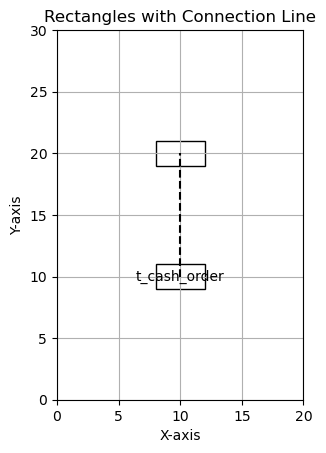

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 创建一个新的图形
fig, ax = plt.subplots()

# 设置坐标轴范围
ax.set_xlim(0, 20)
ax.set_ylim(0, 30)

# 绘制第一个长方形，中心点在 (10, 10)
rect1 = patches.Rectangle((8, 9), 4, 2, edgecolor='black', facecolor='none')
ax.add_patch(rect1)
ax.text(10, 10, 't_cash_order', ha='center', va='center')

# 绘制第二个长方形，中心点在 (10, 20)
rect2 = patches.Rectangle((8, 19), 4, 2, edgecolor='black', facecolor='none')
ax.add_patch(rect2)

# 连接两个长方形的中心点的线
plt.plot([10, 10], [10, 20], color='black', linestyle='--')

# 设置网格和标签
ax.grid()
ax.set_aspect('equal', adjustable='box')
plt.title('Rectangles with Connection Line')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# 显示图形
plt.show()

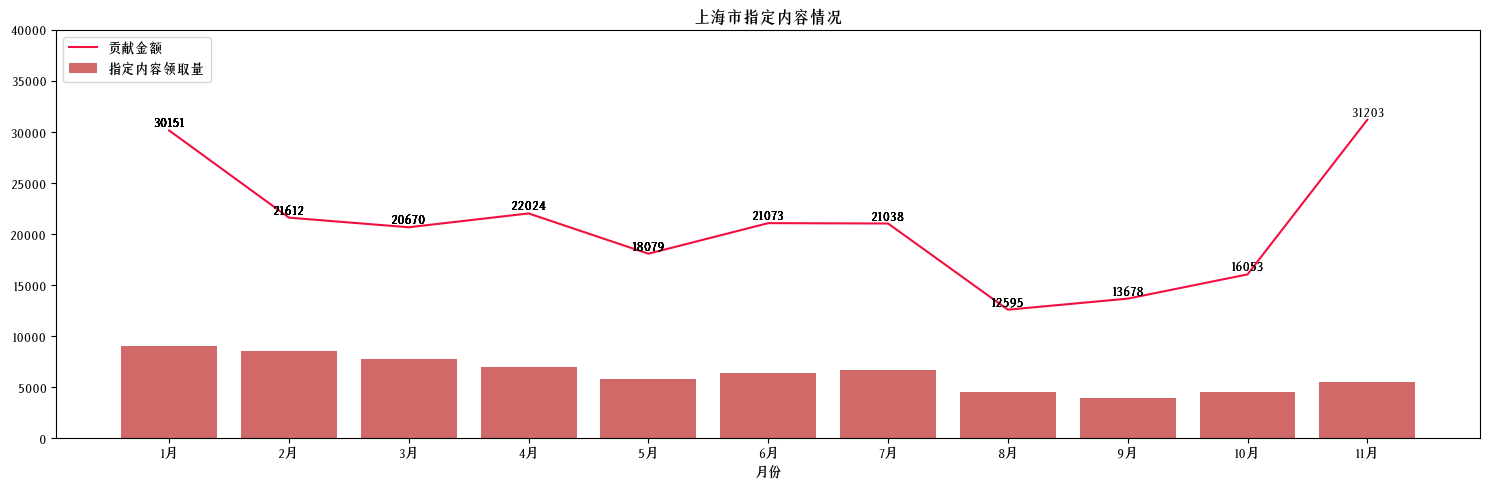

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
#### 步骤0 准备使用的数据
df = pd.read_excel(r"D:\1-script\3-PYTHON\data存储jupyter用的个文件类型数据\指定内容数据24.xlsx",header = 0,sheet_name = '上海指定内容')
df['贡献金额']
df['月份']
df['指定内容领取量']

#### 步骤一 配置全局中文字体 配置负号ascii码展示 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import matplotlib.animation as animation # 动图生成者


font_path = r'C:\\Users\\yaoyan\\AppData\\Local\\Microsoft\\Windows\\Fonts\\字魂45号-冰宇雅宋.ttf' #可修改全局字体
# font_path = r"C:\Users\yaoyan\AppData\Local\Microsoft\Windows\Fonts\字魂240号-清梦手书.ttf"
prop = fm.FontProperties(fname = font_path,weight = 'bold')
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号



#### 步骤二 配置fig和axes 画几个子图 配置几个axes
fig = plt.figure(num = 1,figsize = (15,5),dpi = 100,frameon =True) # 改外层画布属性
ax1 = fig.add_subplot(1,1,1) 

# 设置第一个图（线图）
line, = ax1.plot(df['月份'], df['贡献金额'], color='#f20f3f', label='贡献金额')
ax1.set_xlabel('月份')
# ax1.set_ylabel('贡献金额', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# 创建第二个图（柱状图）
# ax2 = ax1.twinx()  # 共享X轴
bars = ax1.bar(df['月份'], df['指定内容领取量'], color='#b40606', alpha=0.6, label='指定内容领取量')

# ax1.set_ylabel('指定内容领取量', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0,40000)

# 双图添加图例
ax1.legend(loc='upper left')



# 动画更新函数
def update(frame):
    if frame < len(df['月份']):
        # 更新线图
        line.set_data(df['月份'][:frame + 1], df['贡献金额'][:frame + 1])
        
        # 更新柱状图
        for i, bar in enumerate(bars):
            bar.set_height(df['指定内容领取量'][i] if i <= frame else 0)  # 只更新到当前帧的柱状图高度
        
        for j in range(frame + 1):
            ax1.text(df['月份'][j], df['贡献金额'][j], f"{df['贡献金额'][j]}", ha='center', va='bottom')

    return [line] + [bar for bar in bars]  # 返回更新后的艺术家对象列表

# 创建动画
ani = animation.FuncAnimation(fig, update, frames=len(df['月份']), interval=500, blit=True, repeat = 5)

# 保存动图
ani.save(r"C:\Users\yaoyan\Downloads\contribution_animation.gif", writer='pillow', fps=1,
         )  
#确保 ImageMagick 已正确安装。您可以通过访问 ImageMagick 官网 重新下载安装包。
#  writer='imagemagick' 强力的生成gif道具 支持 extra_args=['-loop', '2'] 限制循环次数
# savefig_kwargs={'bbox_inches': 'tight'}紧凑图形

# 显示图形
plt.title('上海市指定内容情况')
plt.tight_layout()
plt.show()

In [46]:
!pip install imageio

Defaulting to user installation because normal site-packages is not writeable


In [49]:
!convert -version

无效驱动器规格。
